# Basic Food Recommender Model

## Background

Program Makan Bergizi Gratis Pemerintah

Pentingnya makanan bergizi bagi kecerdasan otak

_Keywords: Food Recommender, KNN, Neural Network_

## Business Understanding

### Problem Statements

1. How to carry out good data processing that fits the recommender model? 
2. Algoritma machine learning apa yang paling optimal untuk mengembangkan model rekomender makanan bergizi?

3. How to develop the best recommender model?

### Goals

1. Processing raw data into clean data ready to be used to train recommender models.

2. Menemukan algoritma terbaik untuk mengembangkan model rekomender makanan bergizi.

3. Designing the model architecture and configuration with the greatest recommender.

### Solution Statements

1. Carrying out an iterative process that includes Exploratory Data Analysis to understand data characteristics and data transformation to adjust the data format to the recommender model.

2. berexperimen dengan 3 algoritma machine learning dan dibandingkan hasilnya.

3. 

## Data Understanding

### Dataset

Resouce:
[Diet Recommender Dataset](https://www.kaggle.com/code/soumedhik/diet-recommender/input)

#### Overview

Gambaran umum dari dataset keseluruhan

#### Column Description

##### recipes_sample_df

| No | Kolom | Tipe Data | Deskripsi |
|----|-------|-----------|-----------|
| 1 | Name | `object` | Nama resep. |
| 2 | id | `integer` | ID resep. |
| 3 | minutes | `integer` | Waktu yang diperlukan untuk memasak (dalam menit). |
| 4 | contribution_id | `integer` | ID pengguna yang berkontribusi mengunggah resep. |
| 5 | submitted | `object` | Tanggal resep diunggah. |
| 6 | tags | `object` | Kategori atau tag resep. |
| 7 | nutrition | `object`| Informasi nutrisi (kalori, lemak/Total Fat (g), gula (g), sodium (mg), protein (g), lemak jenuh/saturated fat (g), dan karbohidrat (g)). |
| 8 | n_steps | `integer` | Jumlah langkah yang diperlukan untuk memasak. |
| 9 | description | `object` | Deskripsi singkat mengenai resep. |
| 10 | ingredients | `object` | Daftar bahan-bahan yang digunakan dalam resep. |
| 11 | n_ingredients | `integer` | Jumlah bahan yang digunakan dalam resep. |

##### interactions_sample_df

| No | Kolom | Tipe Data | Deskripsi |
|----|-------|-----------|-----------|
| 1 | user_id | `integer` | ID pengguna yang memberikan ulasan. |
| 2 | recipe_id | `integer` | ID resep yang diberi ulasan. |
| 3 | date | `object` | Tanggal ulasan diberikan. |
| 4 | rating | `integer` | Penilaian yang diberikan (dalam skala tertentu). |
| 5 | review | `object` | Isi ulasan yang diberikan pengguna. |

##### food_nutrition_df

| No | Kolom | Tipe Data | Deskripsi |
|----|-------|-----------|-----------|
| 1 | food | `object` | Nama makanan. |
| 2 | serving | `object` | Berat per sajian. |
| 3 | Calories | `object` | Nilai kalori yang terkandung. |

##### people_profile_df

| No | Kolom | Tipe Data | Deskripsi |
|----|-------|-----------|-----------|
| 1 | Unnamed:0 | `integer` | Nomor indeks. |
| 2 | age | `integer` | Usia individu (dalam tahun). |
| 3 | weight (kg) | `float` | Berat badan individu (dalam kilogram). |
| 4 | height (m) | `float` | Tinggi badan individu (dalam meter). |
| 5 | gender | `object` | Jenis kelamin (`F` untuk perempuan, `M` untuk laki-laki.) |
| 6 | BMI | `float` | Body Mass Index. Rasio ideal antara berat dan tinggi badan. |
| 7 | BMR | `float` | Basal Metabolic Rate, kebutuhan kalori dasar individu. |
| 8 | activity_level | `float` | Tingkat aktivitas individu. |
| 9 | calories_to_maintain_weigth | `float` | Kalori yang dibutuhkan untuk mempertahankan berat badan. |
| 10 | BMI_tags | `integer` | Kategori BMI berdasarkan nilai (misalnya underweight, normal, dan overweight.)
| 11 | Label | `integer` | Kategori atau kelas. |

### Import Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Flatten, Dot, Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse, mae
from tensorflow.keras.callbacks import EarlyStopping, Callback, ModelCheckpoint

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.metrics.pairwise import linear_kernel

In [58]:
from surprise import Reader, SVD, accuracy
from surprise.model_selection import train_test_split, cross_validate

In [59]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k

### Load Data

There are 4 dataset need to be loaded

In [60]:
# Data 1
recipes_sample_data = "https://raw.githubusercontent.com/Sulbae/OlahGizi-Project/refs/heads/main/Food%20Recommender/raw-dataset/recipes_sample.csv"
recipes_sample_df = pd.read_csv(recipes_sample_data)

# Data 2
interactions_sample_data = "https://raw.githubusercontent.com/Sulbae/OlahGizi-Project/refs/heads/main/Food%20Recommender/raw-dataset/interactions_sample.csv"
interactions_sample_df = pd.read_csv(interactions_sample_data)

# Data 3
food_nutrition_data = "https://raw.githubusercontent.com/Sulbae/OlahGizi-Project/refs/heads/main/Food%20Recommender/raw-dataset/Food%20and%20Calories.csv"
food_nutrition_df = pd.read_csv(food_nutrition_data)

# Data 4
people_profile_data = "https://raw.githubusercontent.com/Sulbae/OlahGizi-Project/refs/heads/main/Food%20Recommender/raw-dataset/People%20Profile.csv"
people_profile_df = pd.read_csv(people_profile_data)

### Explore Data

#### Explore recipes_sample_df

In [61]:
recipes_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            2316 non-null   object
 1   id              2316 non-null   int64 
 2   minutes         2316 non-null   int64 
 3   contributor_id  2316 non-null   int64 
 4   submitted       2316 non-null   object
 5   tags            2316 non-null   object
 6   nutrition       2316 non-null   object
 7   n_steps         2316 non-null   int64 
 8   steps           2316 non-null   object
 9   description     2264 non-null   object
 10  ingredients     2316 non-null   object
 11  n_ingredients   2316 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 217.2+ KB


* Diketahui dataset memiliki 2 tipe data yaitu `object` dan `int64` dengan total baris sebanyak 2316 untuk hampir seluruh kolom kecuali kolom _description_ yang hanya memiliki 2264 baris data.
* Kolom _submitted_ seharusnya memiliki format data `datetime`.

In [62]:
# Check duplicates
print(f"Duplicated data:", recipes_sample_df.duplicated().sum())

# recheck missing value
print(f"Missing value:", recipes_sample_df.isna().sum())

Duplicated data: 0
Missing value: name               0
id                 0
minutes            0
contributor_id     0
submitted          0
tags               0
nutrition          0
n_steps            0
steps              0
description       52
ingredients        0
n_ingredients      0
dtype: int64


* Setelah dicek ternyata pada kolom _description_ terdapat __52__ __missing value__.

Menampilkan 5 data teratas:

In [63]:
recipes_sample_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,cheesy cauliflower soup crock pot slow cooker,318526,305,369715,2008-08-08,"['course', 'main-ingredient', 'preparation', '...","[411.2, 51.0, 28.0, 17.0, 27.0, 99.0, 5.0]",6,"['put cauliflower , onion , celery and chicken...","a favorite of mine. this is a great, low carb,...","['frozen cauliflower', 'onion', 'celery rib', ...",9
1,chicken enchiladas ii,7399,0,22015,2000-03-06,"['15-minutes-or-less', 'time-to-make', 'course...","[593.2, 46.0, 30.0, 37.0, 66.0, 74.0, 16.0]",10,['cover chicken with water and simmer for 30 m...,NaN,"['chicken breast halves', 'tomatoes', 'cream o...",9
2,simple spinach salad with lemon mint dressing,161266,10,11297,2006-03-23,"['15-minutes-or-less', 'time-to-make', 'course...","[42.3, 0.0, 13.0, 2.0, 6.0, 0.0, 2.0]",9,"['place spinach leaves on a platter', 'mix thr...",the title says it all :) makes a nice healt...,"['baby spinach leaves', 'alfalfa sprout', 'che...",9
3,fat free sugar free soft serve,233665,2,512320,2007-06-09,"['15-minutes-or-less', 'time-to-make', 'course...","[241.8, 2.0, 57.0, 63.0, 21.0, 3.0, 16.0]",1,['mix all the ingredients together with a whis...,for use in a soft serve maker,['fat-free sugar-free instant chocolate puddin...,4
4,u nega gei,306936,50,527886,2008-06-03,"['60-minutes-or-less', 'time-to-make', 'course...","[207.2, 3.0, 7.0, 44.0, 52.0, 3.0, 6.0]",8,"['place broth in a large saucepan', 'add green...",the iroquois confederacy included parts of wha...,"['chicken broth', 'green onion', 'cornmeal', '...",10


Menampilkan statistik deskriptif:

In [64]:
recipes_sample_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,2316,2316,cheesy cauliflower soup crock pot slow cooker,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,2316.0,NaN,NaN,NaN,217649.354059,138741.225067,118.0,97184.5,205436.0,325888.0,536383.0
minutes,2316.0,NaN,NaN,NaN,130.925734,1557.553886,0.0,20.0,37.0,65.0,69120.0
contributor_id,2316.0,NaN,NaN,NaN,6090797.379965,105328791.647271,1533.0,55432.5,171084.0,386145.5,2001389261.0
submitted,2316,1526,2008-03-25,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tags,2316,2292,"['60-minutes-or-less', 'time-to-make', 'prepar...",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nutrition,2316,2316,"[411.2, 51.0, 28.0, 17.0, 27.0, 99.0, 5.0]",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_steps,2316.0,NaN,NaN,NaN,9.625216,6.010024,1.0,6.0,8.0,12.0,57.0
steps,2316,2316,"['put cauliflower , onion , celery and chicken...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,2264,2261,weber's real grilling,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Terdapat hal menarik di mana pada kolom _minutes_ memiliki nilai maksimum 69120. Artinya, seseorang membutuhkan waktu hingga 1152 jam atau 48 hari untuk memasak makanan tersebut. 

Cek distribusi dan outlier data numerik menggunakan histogram dan boxplot:

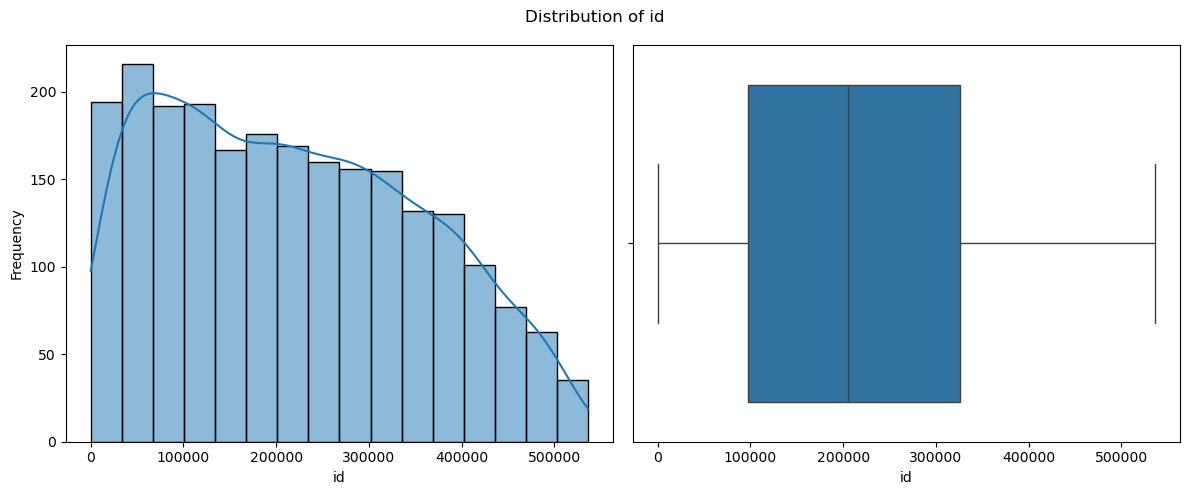

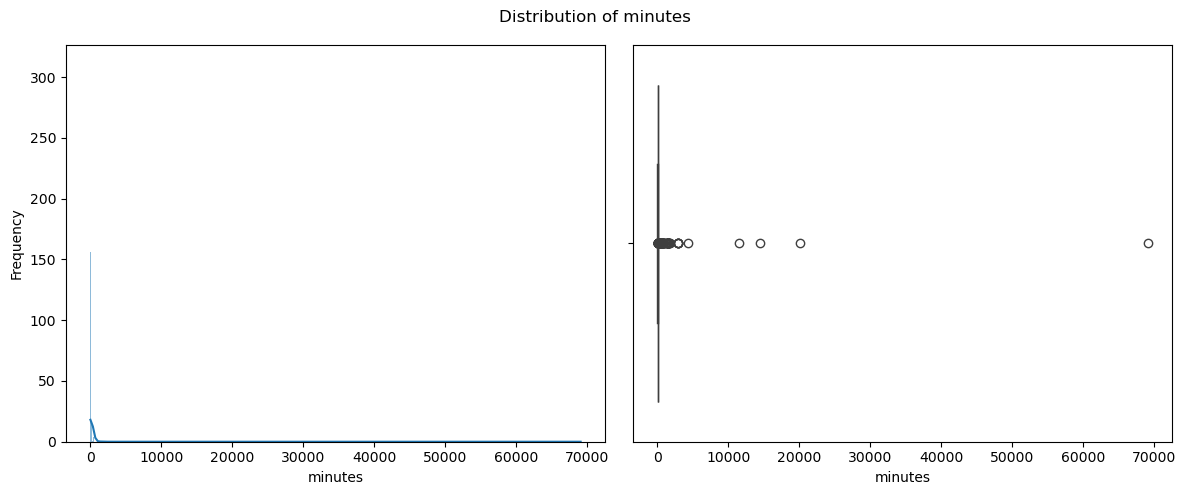

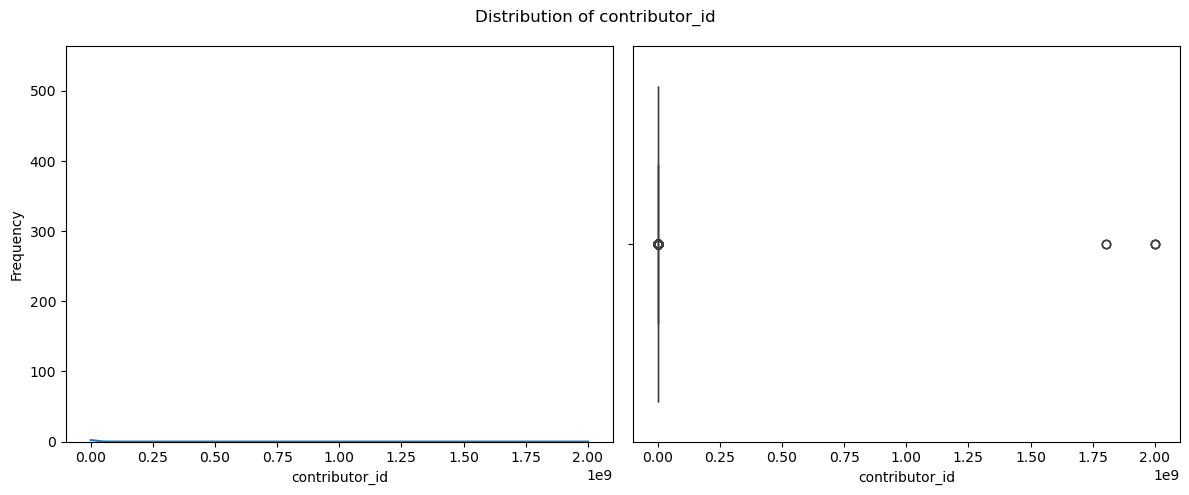

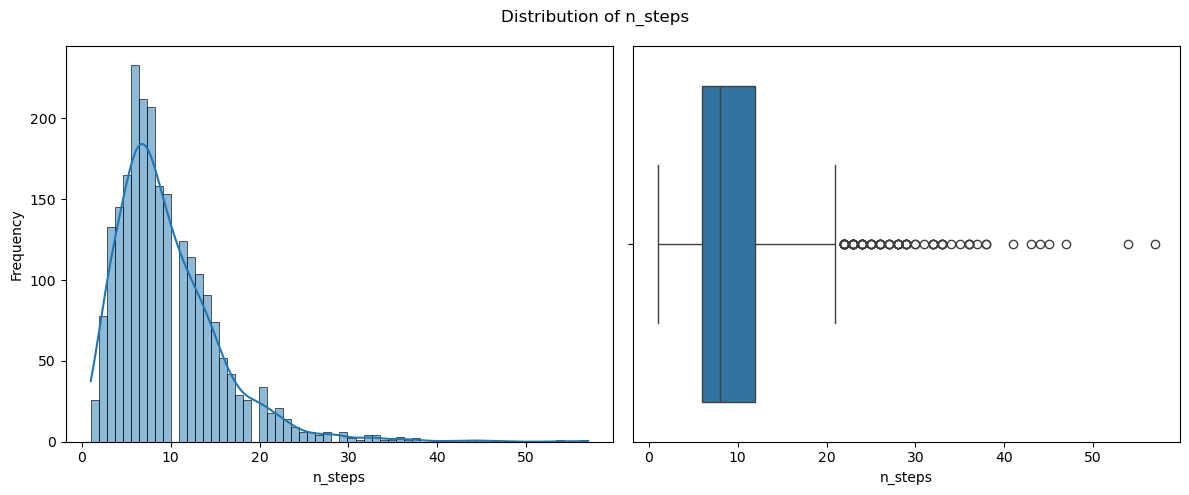

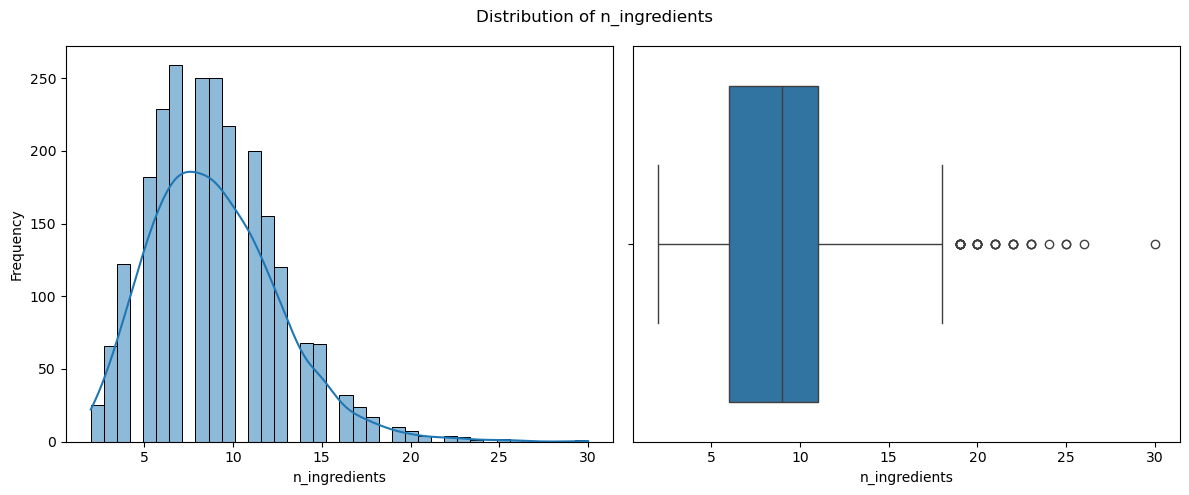

In [65]:
for col in recipes_sample_df.select_dtypes(include="number").columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    fig.suptitle(f"Distribution of {col}")

    # Histogram
    sns.histplot(recipes_sample_df[col], kde=True, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    # Box PLot
    sns.boxplot(x=recipes_sample_df[col], ax=axes[1])

    plt.tight_layout()
    plt.show()

* Diketahui kolom _minutes_ memiliki outlier yang nilainya sangat besar dibandingkan nilai rata-rata.

#### Explore interactions_sample_df

In [66]:
interactions_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11324 entries, 0 to 11323
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    11324 non-null  int64 
 1   recipe_id  11324 non-null  int64 
 2   date       11324 non-null  object
 3   rating     11324 non-null  int64 
 4   review     11323 non-null  object
dtypes: int64(3), object(2)
memory usage: 442.5+ KB


* Diketahui dataset memiliki 2 tipe data yaitu `object` dan `int64` dengan total baris sebanyak 11324 untuk hampir seluruh kolom kecuali kolom _review_ yang hanya memiliki 11323 baris data.
* Kolom _date_ seharusnya memiliki format data `datetime`.

In [67]:
# Check duplicates
print(f"Duplicated data:", interactions_sample_df.duplicated().sum())

# recheck missing value
print(f"Missing value:", interactions_sample_df.isna().sum())

Duplicated data: 0
Missing value: user_id      0
recipe_id    0
date         0
rating       0
review       1
dtype: int64


* Terdapat __1__ __missing value__ pada kolom _review_.

Menampilkan 5 data teratas:

In [68]:
interactions_sample_df.head()

,user_id,recipe_id,date,rating,review
0,167527,380365,2009-09-14,5,I was born and raised in AL...this is a favori...
1,184723,34335,2008-01-15,5,"If I could give this more stars, I would. We ..."
2,2001108724,491150,2018-02-16,5,I made these last night and they were delish! ...
3,135804,50367,2004-04-01,4,Wonderful flavor. Roasting really brings out ...
4,1048246,388076,2010-01-04,5,I wanted to try something different for the ho...


Menampilkan statistik deskriptif:

In [69]:
interactions_sample_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,11324.0,NaN,NaN,NaN,135714284.785588,497314543.229327,1533.0,137130.25,335614.0,804550.0,2002361699.0
recipe_id,11324.0,NaN,NaN,NaN,160390.387142,130555.805881,55.0,54960.0,118763.5,241566.75,536678.0
date,11324,4374,2008-01-02,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,11324.0,NaN,NaN,NaN,4.401095,1.277812,0.0,4.0,5.0,5.0,5.0
review,11323,11306,Excellent!,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Diketahui mayoritas user memberikan nilai 4-5.

Cek distribusi dan outlier data _rating_ menggunakan histogram dan boxplot:

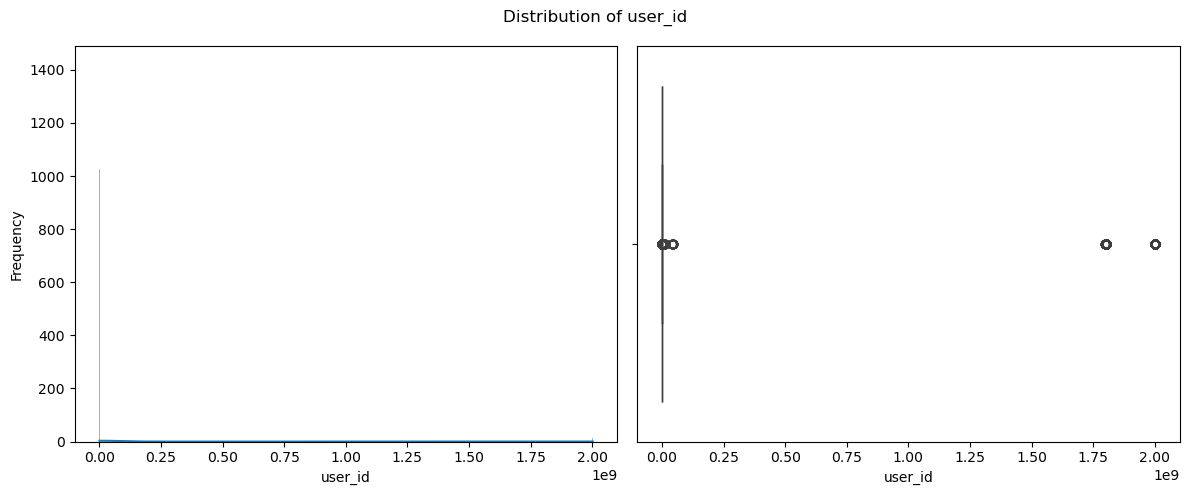

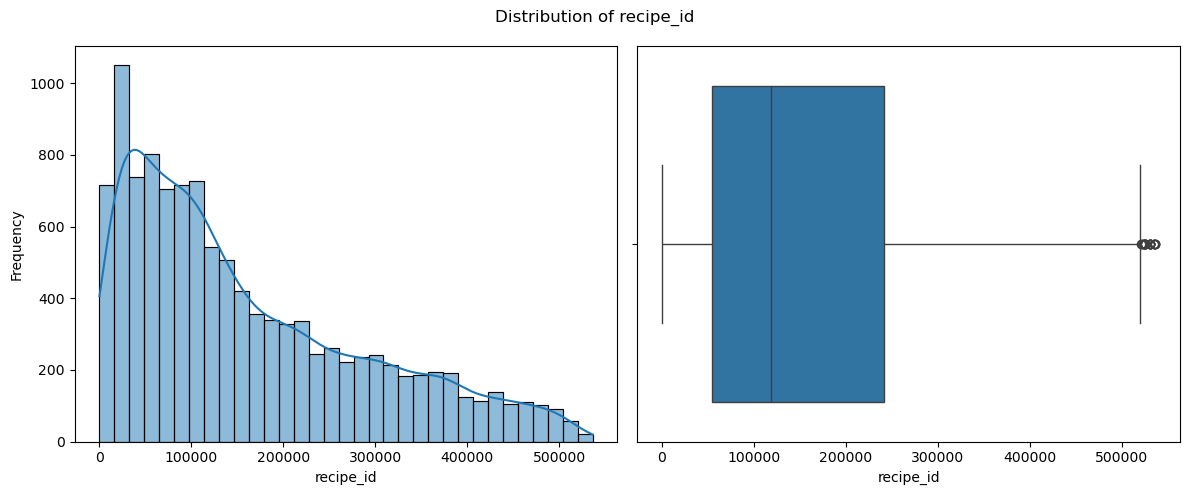

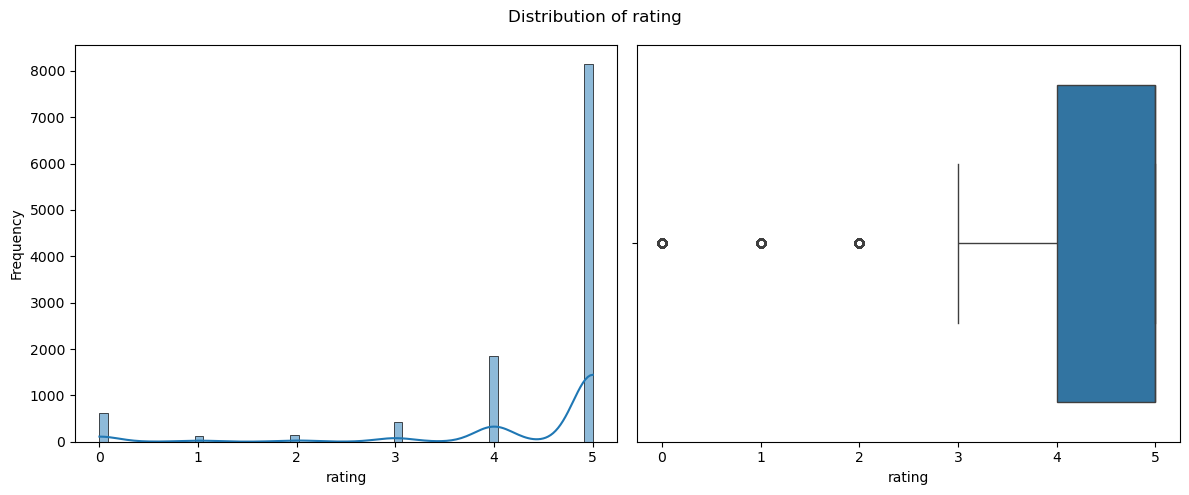

In [70]:
for col in interactions_sample_df.select_dtypes(include="number").columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    fig.suptitle(f"Distribution of {col}")

    # Histogram
    sns.histplot(interactions_sample_df[col], kde=True, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    # Box PLot
    sns.boxplot(x=interactions_sample_df[col], ax=axes[1])

    plt.tight_layout()
    plt.show()

#### Explore food_nutrition_df

In [71]:
food_nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      562 non-null    object
 1   Serving   562 non-null    object
 2   Calories  562 non-null    object
dtypes: object(3)
memory usage: 13.3+ KB


* Dataset memiliki 562 baris data dengan tipe data `object`.

In [72]:
# Check duplicates
print(f"Duplicated data:", food_nutrition_df.duplicated().sum())

# Check missing value
print(f"Missing value:", food_nutrition_df.isna().sum().sum())

Duplicated data: 13
Missing value: 0


* Terdapat 13 duplikasi data.

Menampilkan 5 data teratas:

In [73]:
food_nutrition_df.head()

,Food,Serving,Calories
0,Artichoke,1 artichoke (128 g),60 cal
1,Arugula,1 leaf (2 g),1 cal
2,Asparagus,1 spear (12 g),2 cal
3,Aubergine,1 aubergine (458 g),115 cal
4,Beetroot,1 beet (82 g),35 cal


Menampilkan statistik deskriptif:

In [74]:
food_nutrition_df.describe(include="all").T

,count,unique,top,freq
Food,562,541,Olives,2
Serving,562,381,1 tbsp (14 ml),30
Calories,562,307,124 cal,15


* Diketahui terdapat 541 data unik untuk kolom _Food_, sedangkan total baris data sebanyak 562.

Cek duplikasi data pada kolom _Food_:

In [75]:
food_duplicates = food_nutrition_df[food_nutrition_df["Food"].duplicated()] 
print(food_duplicates)


                     Food                  Serving Calories
95                 Olives          1 olive (2.7 g)    2 cal
139        Collard Greens             1 cup (45 g)   13 cal
197            Brown Rice            1 cup (195 g)  757 cal
309              Pea Soup            1 cup (253 g)  190 cal
312                 Ramen         1 package (85 g)  371 cal
375  Durum Wheat Semolina             2 oz. (56 g)  222 cal
392               Ravioli             2 oz. (56 g)   43 cal
453               Avocado        1 avocado (200 g)  320 cal
454                Banana         1 banana (125 g)  111 cal
464                 Guava           1 guava (55 g)   37 cal
466             Jackfruit            1 cup (151 g)  143 cal
467                  Kiwi           1 kiwi (183 g)  112 cal
470      Mandarin Oranges  1 madarin orange (90 g)   48 cal
471                 Mango          1 mango (336 g)  202 cal
477         Passion Fruit   1 passion fruit (18 g)   17 cal
478             Pineapple      1 pineapp

Cek apakah benar data tersebut identik satu sama lain:

In [81]:
selected_foods = ['Olives','Collard Greens', 'Brown Rice', 'Pea Soup', 'Ramen', 'Durum Wheat Semolina', 'Revioli', 'Avocado', 'Banana', 'Guava', 'Jackfruit', 'Kiwi', 'Mandarin Oranges', 'Mango', 'Passion Fruit', 'Pineapple', 'Pomegranate', 'Rambutan', 'Tamarind', 'Watermelon', 'Fish and Chips']
print(food_nutrition_df[food_nutrition_df["Food"].isin(selected_foods)].sort_values(by='Food'))

                     Food                   Serving Calories
67                Avocado         1 avocado (200 g)  320 cal
453               Avocado         1 avocado (200 g)  320 cal
454                Banana          1 banana (125 g)  111 cal
68                 Banana          1 banana (125 g)  111 cal
197            Brown Rice             1 cup (195 g)  757 cal
126            Brown Rice             1 cup (185 g)  670 cal
19         Collard Greens         1 cup, raw (36 g)   12 cal
139        Collard Greens              1 cup (45 g)   13 cal
375  Durum Wheat Semolina              2 oz. (56 g)  222 cal
205  Durum Wheat Semolina             1 tbsp (30 g)  119 cal
149        Fish and Chips         1 serving (300 g)  585 cal
522        Fish and Chips         1 serving (300 g)  585 cal
464                 Guava            1 guava (55 g)   37 cal
83                  Guava            1 guava (55 g)   37 cal
84              Jackfruit             1 cup (151 g)  143 cal
466             Jackfrui

#### Explore people_profile_df

In [20]:
people_profile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10726 entries, 0 to 10725
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   10726 non-null  int64  
 1   age                          10726 non-null  int64  
 2   weight(kg)                   10726 non-null  float64
 3   height(m)                    10726 non-null  float64
 4   gender                       10726 non-null  object 
 5   BMI                          10726 non-null  float64
 6   BMR                          10726 non-null  float64
 7   activity_level               10726 non-null  float64
 8   calories_to_maintain_weight  10726 non-null  float64
 9   BMI_tags                     10726 non-null  int64  
 10  Label                        10726 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 921.9+ KB


* Diketahui dataset memiliki 3 tipe data yaitu `object`, `float64`, dan `int64` dengan total baris sebanyak 10726 untuk seluruh kolom.

In [21]:
# Check duplicates
print(f"Duplicated data:", people_profile_df.duplicated().sum())

# Check missing value
print(f"Missing value:", people_profile_df.isna().sum().sum())

Duplicated data: 0
Missing value: 0


* Dataset tidak memiliki duplikasi data dan missing value.

Menampilkan 5 data teratas:

In [22]:
people_profile_df.head()

,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
1,2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
2,4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
3,6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
4,8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0


* Diketahui representasi nilai dari kolom Unnamed:0 sulit untuk diidentifikasi. 

Menampilkan statistik deskriptif:

In [23]:
people_profile_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,10726.0,NaN,NaN,NaN,11664.753123,6814.683196,1.0,5959.75,10695.5,17455.25,23998.0
age,10726.0,NaN,NaN,NaN,26.778575,18.201675,2.0,13.0,23.0,36.0,90.0
weight(kg),10726.0,NaN,NaN,NaN,61.647728,24.254566,12.005536,45.538375,61.32346,83.484585,98.79982
height(m),10726.0,NaN,NaN,NaN,1.540276,0.186042,0.856328,1.564845,1.631282,1.632234,1.633223
gender,10726,2,F,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,10726.0,NaN,NaN,NaN,24.788317,6.954637,10.342285,19.557137,23.056039,31.334294,37.142927
BMR,10726.0,NaN,NaN,NaN,1442.049923,250.686166,667.941,1320.3225,1493.165,1602.488,1914.374
activity_level,10726.0,NaN,NaN,NaN,1.487451,0.239625,1.2,1.3,1.5,1.7,1.9
calories_to_maintain_weight,10726.0,NaN,NaN,NaN,2118.574075,388.425427,953.5409,1815.8797,2104.5998,2405.30175,2949.0755
BMI_tags,10726.0,NaN,NaN,NaN,8.253496,0.754767,7.0,8.0,8.0,9.0,9.0


* Diketahui rentang usia pada data adalah balita (< 5 tahun), anak-anak (6 - 10 tahun), remaja (12 - 17 tahun), dewasa (18 - 60 tahun), hingga lanjut usia (>70 tahun).
* Diketahui kolom _BMI_tags_ pada data memiliki rentang nilai 7 - 9, sedangkan kolom _Label_ memiliki nilai dengan rentang 0 - 31.

Cek distribusi dan outlier data menggunakan histogram and boxplot:

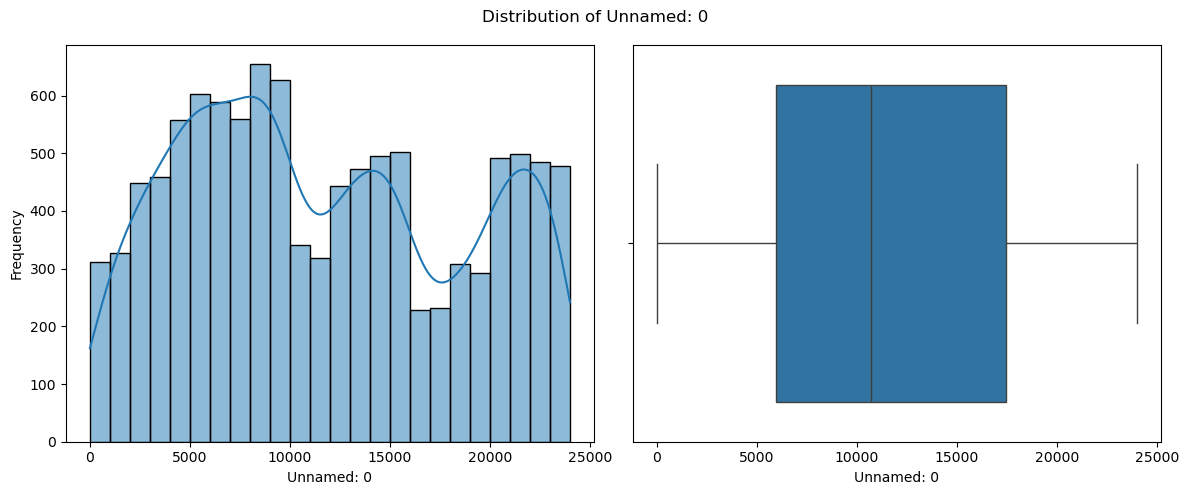

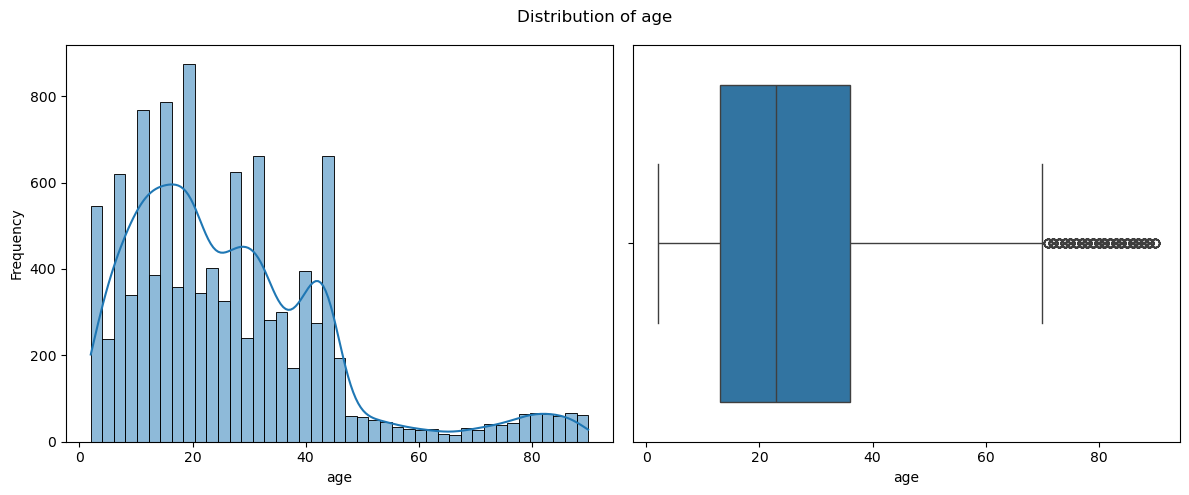

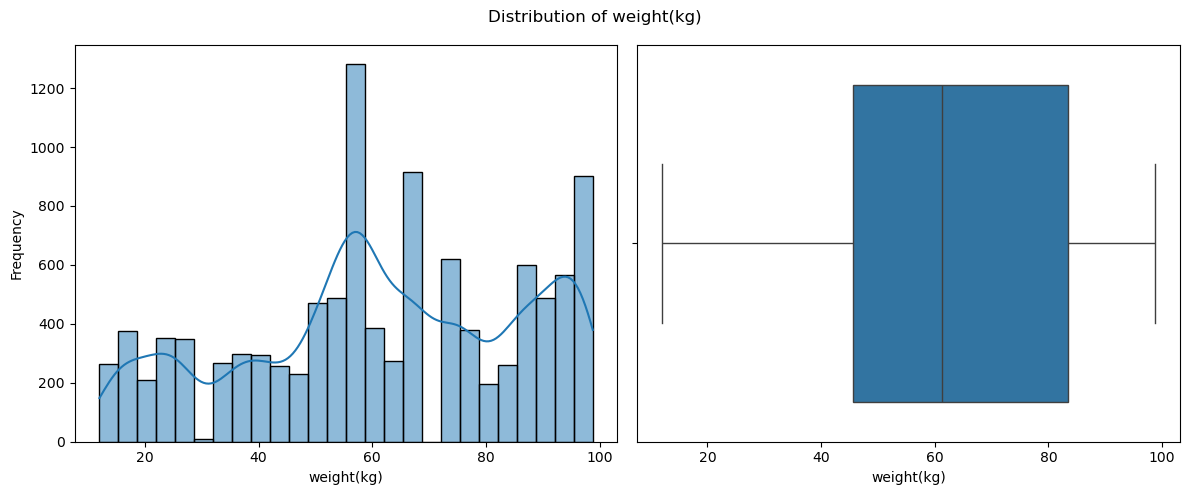

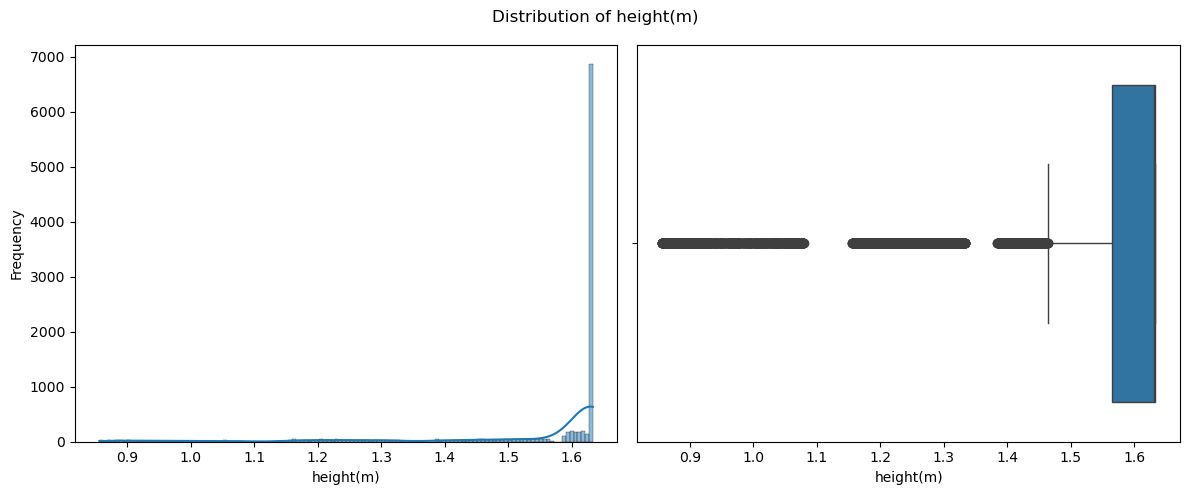

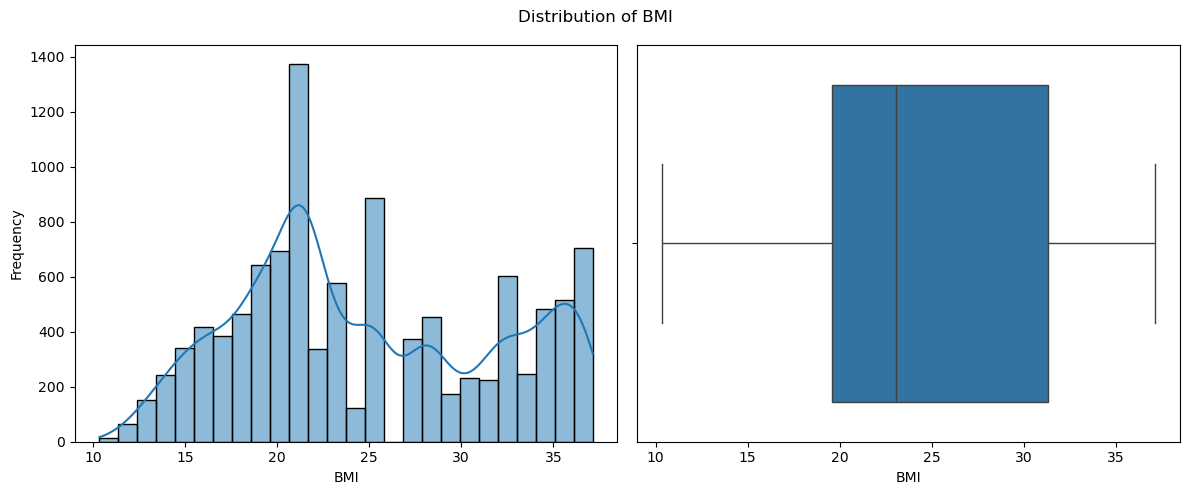

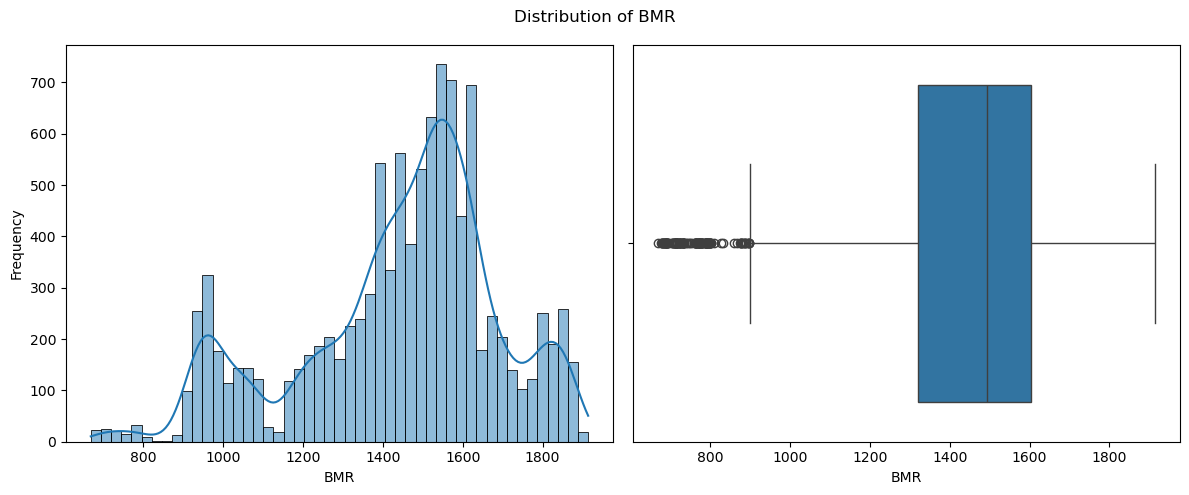

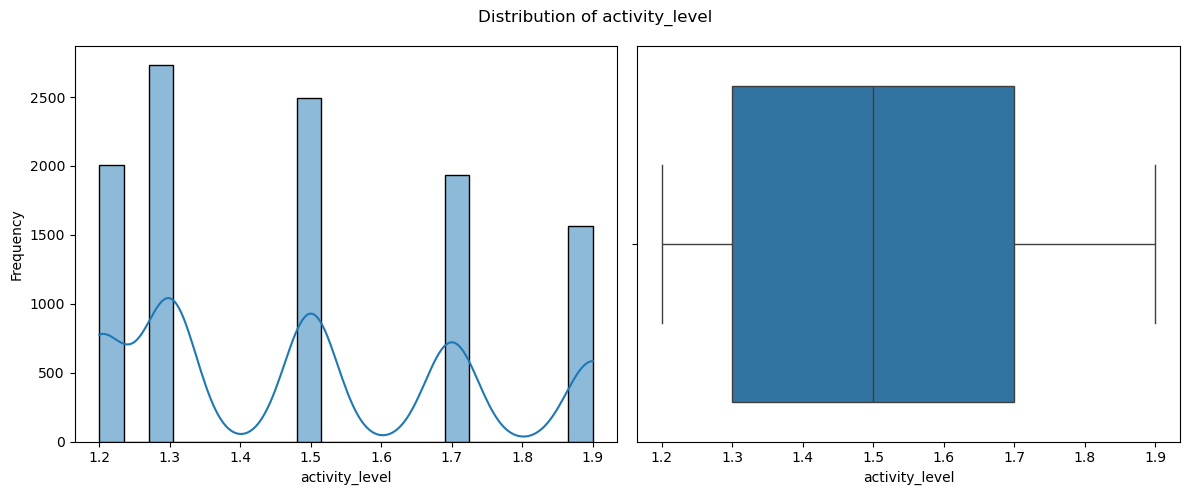

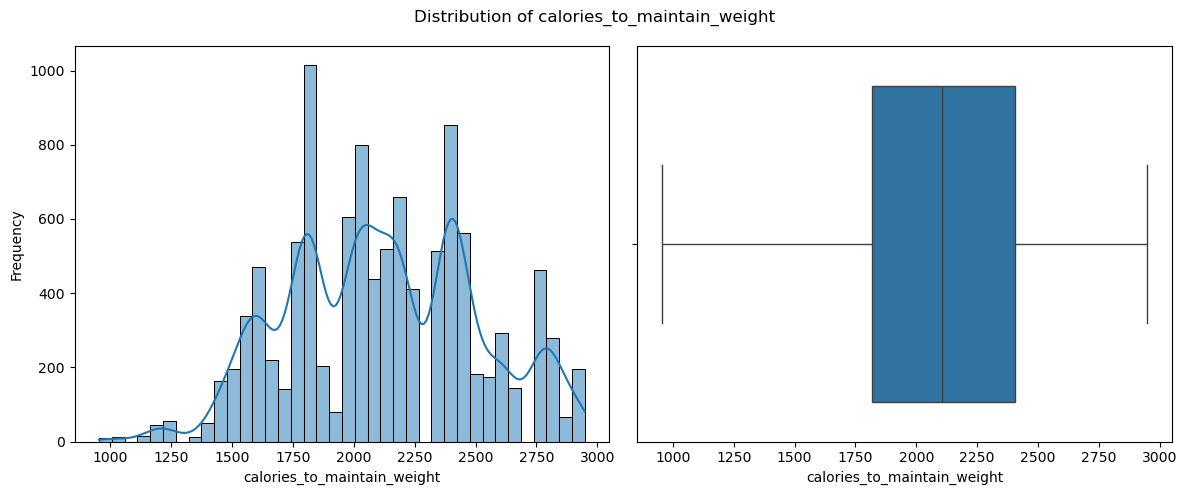

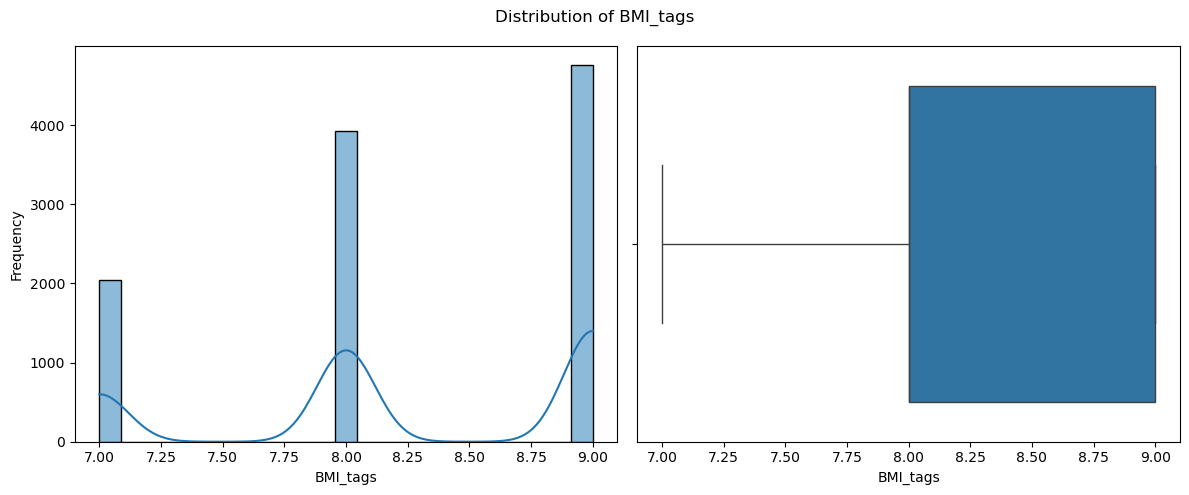

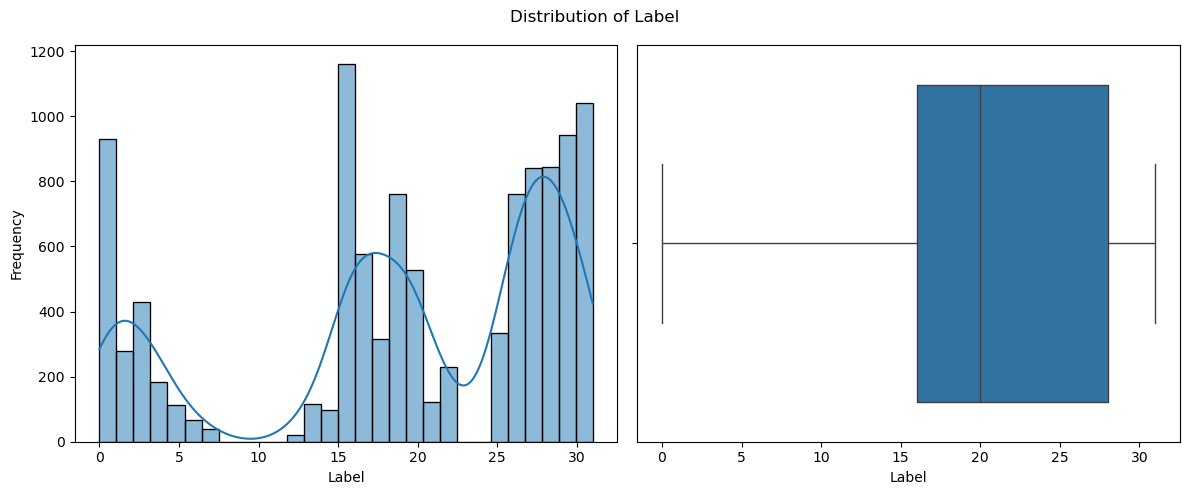

In [24]:
# Check the data distribution of numerical columns
for col in people_profile_df.select_dtypes(include="number").columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    fig.suptitle(f"Distribution of {col}")

    # Histogram
    sns.histplot(people_profile_df[col], kde=True, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    # Box PLot
    sns.boxplot(x=people_profile_df[col], ax=axes[1])

    plt.tight_layout()
    plt.show()

Cek correlation antar variabel data menggunakan _heatmap correlation matrix_.

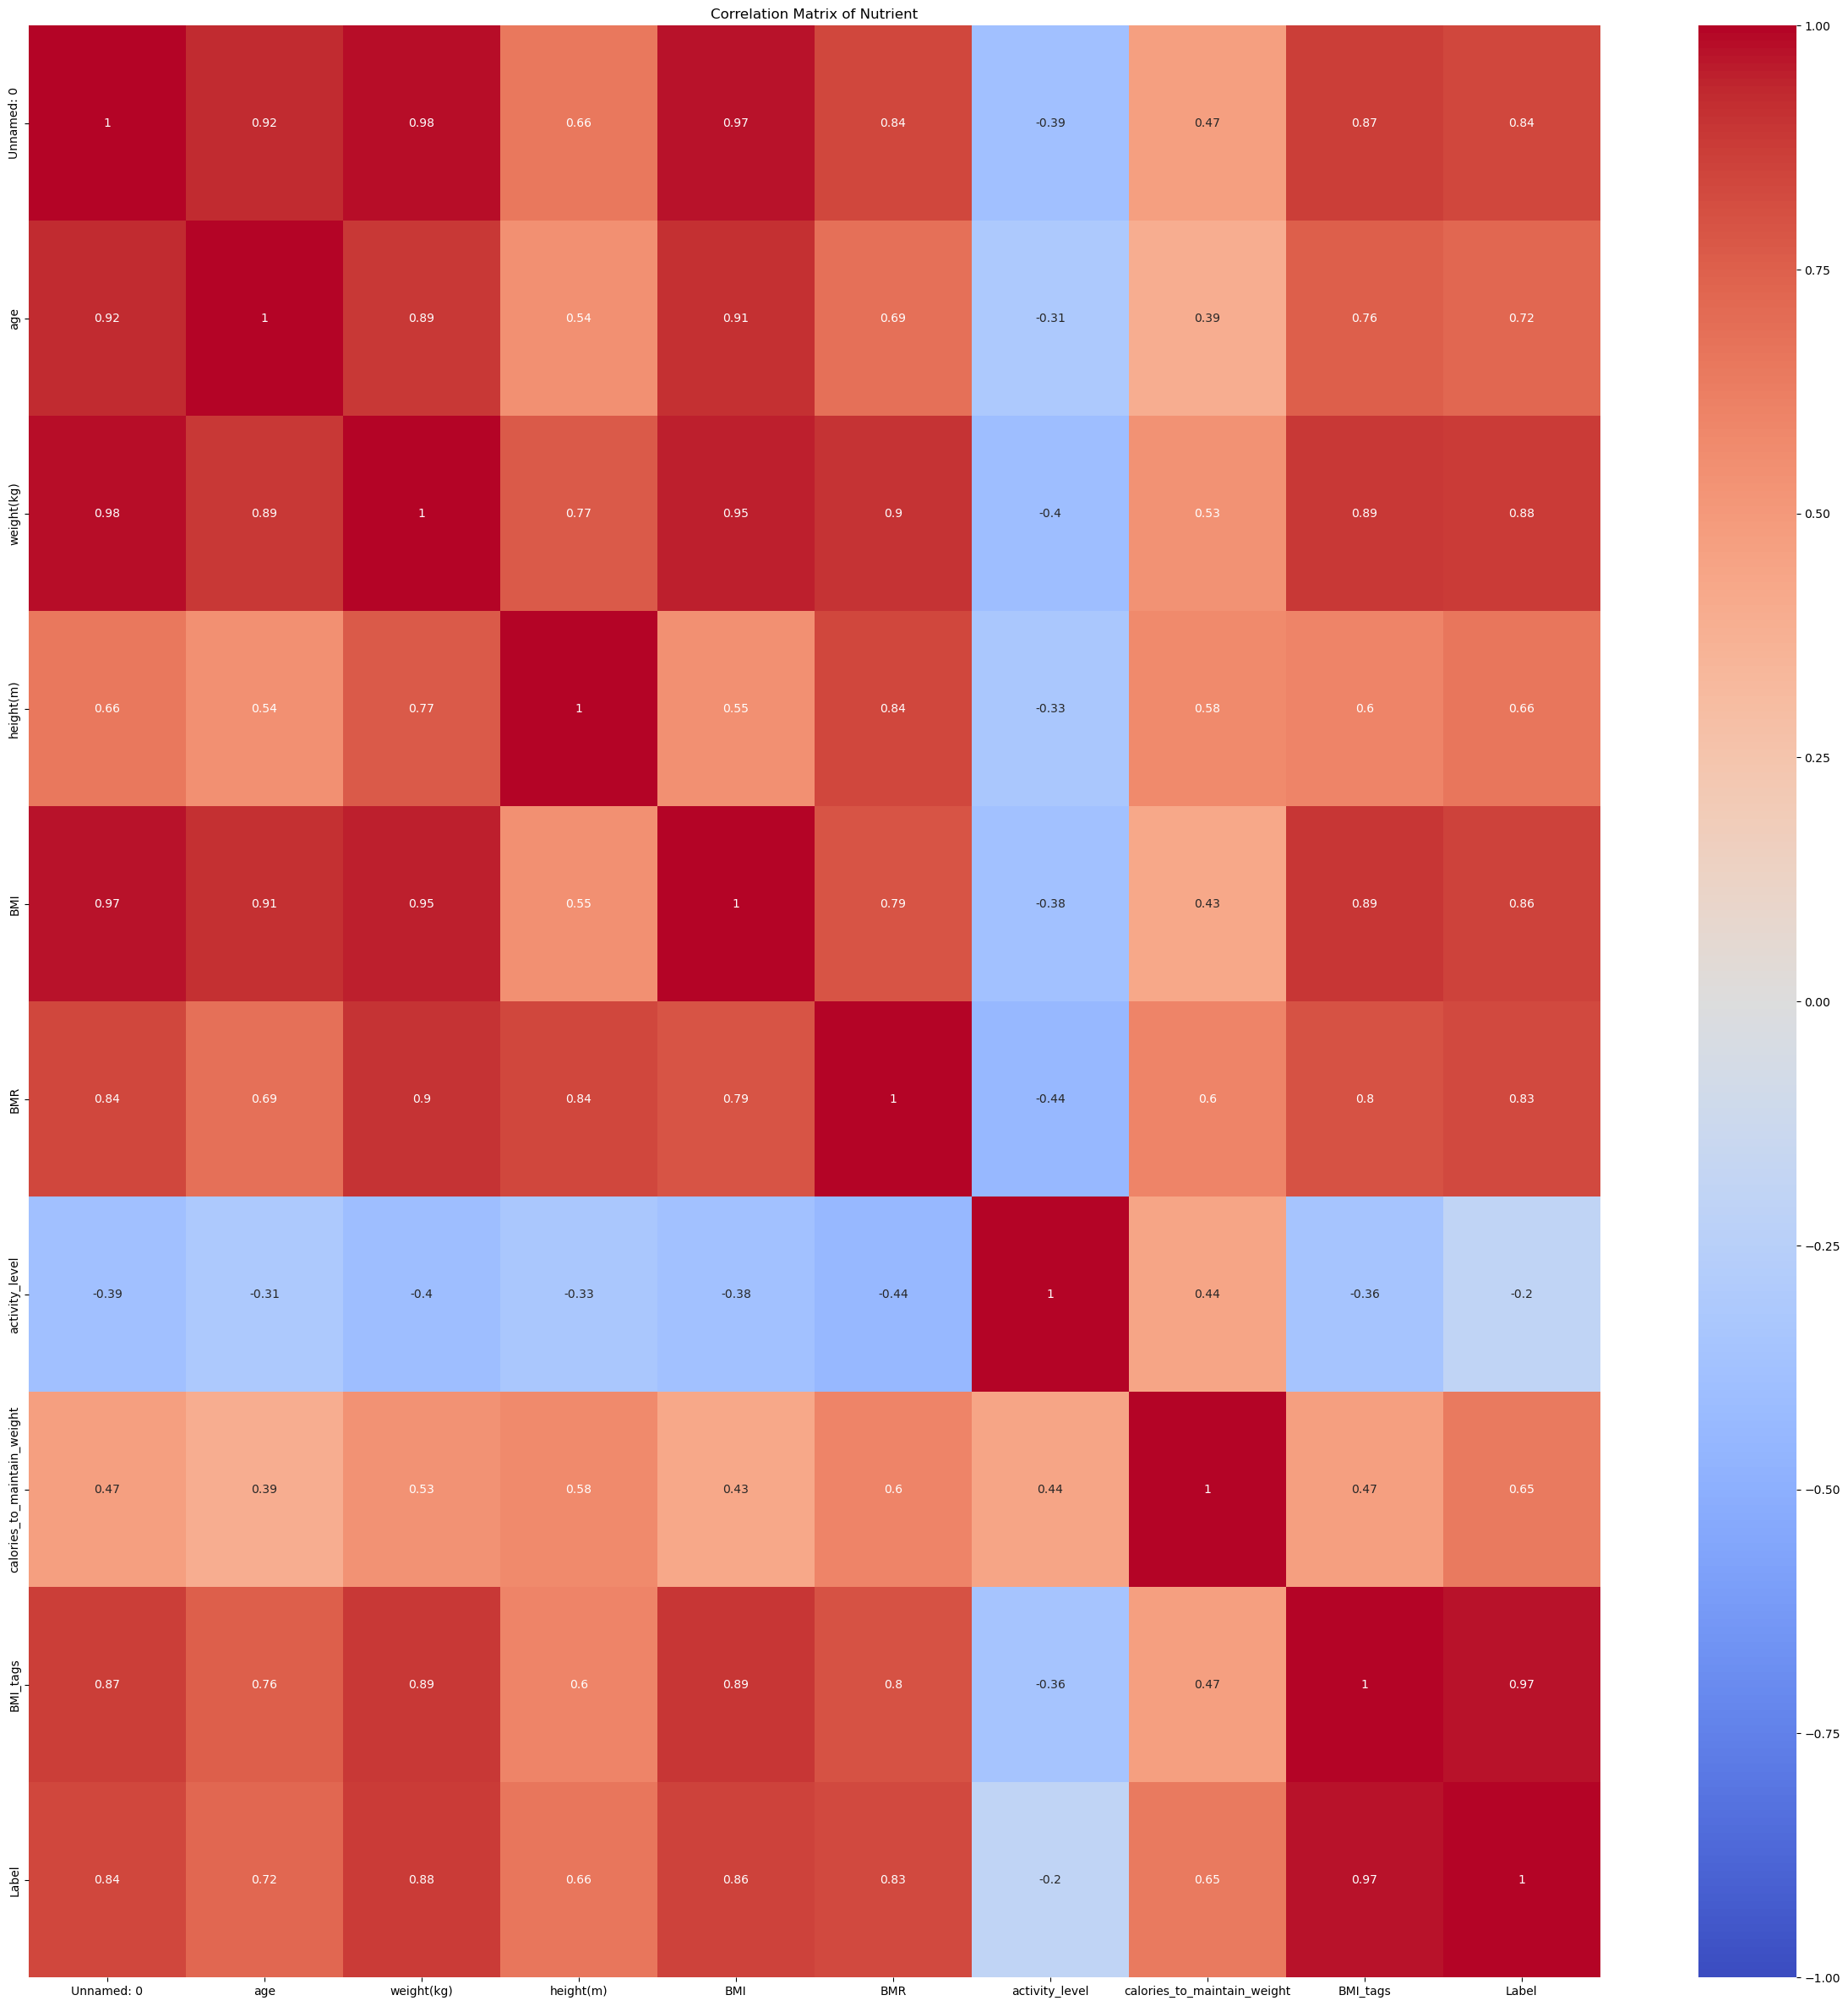

In [25]:
# Check data correlation
plt.figure(figsize=(30, 30))
sns.heatmap(people_profile_df.select_dtypes(include="number").corr(),
            annot=True,
            cmap="coolwarm",
            vmin=-1,
            vmax=1)
plt.title("Correlation Matrix of Nutrient")
plt.show()

* Dikethui 

## Data Preparation

#### Cleaning Data

##### Remove Duplicated Data

Menghapus duplikasi data pada `food_nutrition_df`:

In [26]:
food_nutrition_df = food_nutrition_df.drop_duplicates()

Recheck:

In [27]:
# Recheck duplicates
print(f"Duplicated data:", food_nutrition_df.duplicated().sum())

Duplicated data: 0


In [43]:
food_nutrition_df.describe(include="all").T

,count,unique,top,freq
Food,549,541,Ravioli,2
Serving,549,381,2 oz. (56 g),30
Calories,549,307,124 cal,15


###### Remove duplikat pada kolom Food dari food_nutrition_df

In [86]:
food_nutrition_df = food_nutrition_df.drop_duplicates(subset=["Food"])

Recheck:

In [87]:
print(food_nutrition_df[food_nutrition_df["Food"].duplicated()])

Empty DataFrame
Columns: [Food, Serving, Calories]
Index: []


In [88]:
food_nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 561
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      541 non-null    object
 1   Serving   541 non-null    object
 2   Calories  541 non-null    object
dtypes: object(3)
memory usage: 16.9+ KB


In [89]:
food_nutrition_df.describe(include="all").T

,count,unique,top,freq
Food,541,541,Artichoke,1
Serving,541,376,1 tbsp (14 ml),30
Calories,541,305,124 cal,15


##### Remove Missing Value

Menghapus baris data yang memiliki missing value pada  `recipes_samplpe_df`:

In [28]:
recipes_sample_df = recipes_sample_df.dropna()

Recheck:

In [29]:
# Recheck missing value
print(f"Missing value:", recipes_sample_df.isna().sum().sum())

Missing value: 0


In [44]:
recipes_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2239 non-null   object        
 1   id              2239 non-null   int64         
 2   minutes         2239 non-null   int64         
 3   contributor_id  2239 non-null   int64         
 4   submitted       2239 non-null   datetime64[ns]
 5   tags            2239 non-null   object        
 6   nutrition       2239 non-null   object        
 7   n_steps         2239 non-null   int64         
 8   steps           2239 non-null   object        
 9   description     2239 non-null   object        
 10  ingredients     2239 non-null   object        
 11  n_ingredients   2239 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 227.4+ KB


Menghapus baris data yang memiliki missing value pada  `interaction_samplpe_df`:

In [30]:
interactions_sample_df = interactions_sample_df.dropna()

Recheck:

In [45]:
# Recheck missing value
print(f"Missing value:", interactions_sample_df.isna().sum().sum())

Missing value: 0


In [46]:
interactions_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11323 entries, 0 to 11323
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    11323 non-null  int64         
 1   recipe_id  11323 non-null  int64         
 2   date       11323 non-null  datetime64[ns]
 3   rating     11323 non-null  int64         
 4   review     11323 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 530.8+ KB


##### Convert _Date_ to `datetime`

Kolom _submitted_ pada recipes_sample_df:

In [32]:
recipes_sample_df['submitted'] = pd.to_datetime(recipes_sample_df['submitted'])
recipes_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 0 to 2315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2264 non-null   object        
 1   id              2264 non-null   int64         
 2   minutes         2264 non-null   int64         
 3   contributor_id  2264 non-null   int64         
 4   submitted       2264 non-null   datetime64[ns]
 5   tags            2264 non-null   object        
 6   nutrition       2264 non-null   object        
 7   n_steps         2264 non-null   int64         
 8   steps           2264 non-null   object        
 9   description     2264 non-null   object        
 10  ingredients     2264 non-null   object        
 11  n_ingredients   2264 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 229.9+ KB


Kolom _date_ pada interactions_sample_df:

In [33]:
interactions_sample_df['date'] = pd.to_datetime(interactions_sample_df['date'])
interactions_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11323 entries, 0 to 11323
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    11323 non-null  int64         
 1   recipe_id  11323 non-null  int64         
 2   date       11323 non-null  datetime64[ns]
 3   rating     11323 non-null  int64         
 4   review     11323 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 530.8+ KB


#### Outlier Handling

Remove outlier dari data _minutes_ pada recipes_sample_df:

In [34]:
recipes_sample_df = recipes_sample_df[recipes_sample_df['minutes'] <= 1440]
recipes_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            2239 non-null   object        
 1   id              2239 non-null   int64         
 2   minutes         2239 non-null   int64         
 3   contributor_id  2239 non-null   int64         
 4   submitted       2239 non-null   datetime64[ns]
 5   tags            2239 non-null   object        
 6   nutrition       2239 non-null   object        
 7   n_steps         2239 non-null   int64         
 8   steps           2239 non-null   object        
 9   description     2239 non-null   object        
 10  ingredients     2239 non-null   object        
 11  n_ingredients   2239 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 227.4+ KB


* Menghapus data resep makanan yang membutuhkan waktu lebih dari 24 jam atau 1440 menit untuk memasaknya.

#### Split Data

Separate data into features (X) and target (y)

In [ ]:
# Feature
X = data_normalized.iloc[:, :-1]

# Target
y = data_normalized.iloc[:, -1]

Determined the `data_train` portion of the data. There are two splitting schemes

In [ ]:
TEST_SIZE_1 = 0.1 # 90% data_train, 5% data_validation, 5% data_test
TEST_SIZE_2 = 0.2 # 80% data_train, 10% data_validation, 10% data_test

Create custom function (`split_data`) to do data splitting

In [ ]:
## Split Function
def split_data(X, y, TEST_SIZE):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y,
                                                        test_size=TEST_SIZE,
                                                        random_state=123)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                                    test_size=0.5,
                                                    random_state=123)
    return X_train, X_val, X_test, y_train, y_val, y_test

Split the data 

In [ ]:
# Split data into data_train, data_val, and data_test
## TEST_SIZE_1
X_train_1, X_val_1, X_test_1, y_train_1, y_val_1, y_test_1 = split_data(X, y, TEST_SIZE_1)

## TEST_SIZE_2
X_train_2, X_val_2, X_test_2, y_train_2, y_val_2, y_test_2 = split_data(X, y, TEST_SIZE_2)

#### Convert Data

Show the top 5 merged data

In [31]:
merged_data.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


_As mentioned in data understanding section, particularlyy column description:_
* Caloric Value unit is in kcal
* Fat, Saturated Fats, Monounsaturated Fats, Polyunsaturated Fats, Carbohydrates, Sugars, Protein, Dietary Fiber, and Water unit is in g

We need to convert data unit that is in grams to milligrams

In [32]:
# grams to milligrams
column_in_grams = ["Fat", 
                   "Saturated Fats",
                   "Monounsaturated Fats",
                   "Polyunsaturated Fats",
                   "Carbohydrates",
                   "Sugars",
                   "Protein",
                   "Dietary Fiber",
                   "Water"]

merged_data[column_in_grams] = merged_data[column_in_grams] * 1000

Check the converted data by showing the top 5 of them

In [33]:
merged_data.head()

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5000.0,2900.0,1300.0,200.0,800.0,500.0,900.0,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19400.0,10900.0,4900.0,800.0,3100.0,2700.0,7800.0,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3600.0,2300.0,900.0,0.0,900.0,3400.0,800.0,100.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2000.0,1300.0,500.0,2.0,1500.0,91.0,1500.0,0.0,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2300.0,1400.0,600.0,42.0,1200.0,900.0,1200.0,0.0,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


### Features Selection

Removing the columns have little effect to the nutrition density, So we just need to use the columns have high correlation to the nutrition density to train the machine learning model.

In [34]:
columns_to_eliminate = ["food", "Vitamin A", "Vitamin B11", "Vitamin B12", "Vitamin D", "Vitamin K", "Copper", "Manganese", "Selenium"]

selected_features = merged_data.drop(columns=columns_to_eliminate, axis=1)
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Caloric Value         2395 non-null   int64  
 1   Fat                   2395 non-null   float64
 2   Saturated Fats        2395 non-null   float64
 3   Monounsaturated Fats  2395 non-null   float64
 4   Polyunsaturated Fats  2395 non-null   float64
 5   Carbohydrates         2395 non-null   float64
 6   Sugars                2395 non-null   float64
 7   Protein               2395 non-null   float64
 8   Dietary Fiber         2395 non-null   float64
 9   Cholesterol           2395 non-null   float64
 10  Sodium                2395 non-null   float64
 11  Water                 2395 non-null   float64
 12  Vitamin B1            2395 non-null   float64
 13  Vitamin B2            2395 non-null   float64
 14  Vitamin B3            2395 non-null   float64
 15  Vitamin B5           

### Data Normalization

#### Log Transform

Transform the data to logarithmic value using `np.log()`

In [35]:
# Log transform data
columns_to_log = selected_features.columns

selected_features[columns_to_log] = selected_features[columns_to_log].apply(lambda x: np.log(x + 1))

Show the top 5 transformed data

In [36]:
selected_features.head()

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Vitamin B6,Vitamin C,Vitamin E,Calcium,Iron,Magnesium,Phosphorus,Potassium,Zinc,Nutrition Density
0,3.951244,8.517393,7.972811,7.170888,5.303305,6.685861,6.216606,6.803505,0.000000,2.747271,...,0.091667,0.003992,0.000000,0.007968,0.078811,0.026642,0.087095,2.803360,0.038259,2.088153
1,5.375278,9.873080,9.296610,8.497195,6.685861,8.039480,7.901377,8.962007,0.000000,4.157319,...,0.075107,0.000000,0.262364,4.610158,0.095310,2.251292,4.773224,4.869072,0.530628,4.875960
2,3.912023,8.188967,7.741099,6.803505,0.000000,6.803505,8.131825,6.685861,4.615121,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.856298
3,3.433987,7.601402,7.170888,6.216606,1.098612,7.313887,4.521789,7.313887,0.000000,2.379546,...,0.006976,0.005982,0.001000,0.092579,0.092579,0.091667,0.023717,3.459466,0.034401,1.823904
4,3.433987,7.741099,7.244942,6.398595,3.761200,7.090910,6.803505,7.090910,0.000000,2.208274,...,0.002996,0.000000,0.008960,3.144152,0.007968,0.788457,3.169686,3.640214,0.051643,3.332454


Check the statistical descriptive of the transformed data

In [37]:
selected_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Caloric Value,2395.0,4.597343,1.426951,0.0,3.817652,4.770685,5.556828,8.712431
Fat,2395.0,7.181209,2.653112,0.0,5.707110,7.650169,9.148571,13.218947
Saturated Fats,2395.0,5.726636,2.813508,0.0,4.174387,6.216606,7.901377,13.418015
Monounsaturated Fats,2395.0,5.798693,2.955868,0.0,4.077537,6.216606,8.131825,12.581426
Polyunsaturated Fats,2395.0,5.532763,2.654137,0.0,4.276666,5.993961,7.438972,12.144203
Carbohydrates,2395.0,7.333303,3.869435,0.0,6.216606,8.824825,10.128667,12.874417
Sugars,2395.0,4.127193,4.077601,0.0,0.000000,4.465908,8.071219,12.582799
Protein,2395.0,7.587971,2.812412,0.0,6.685861,8.160804,9.495594,13.236229
Dietary Fiber,2395.0,4.182385,3.803076,0.0,0.000000,5.303305,7.696667,11.245059
Cholesterol,2395.0,1.552149,2.096451,0.0,0.000000,0.000000,3.312351,9.260082


Check the distribution of Caloric Value data after transformation

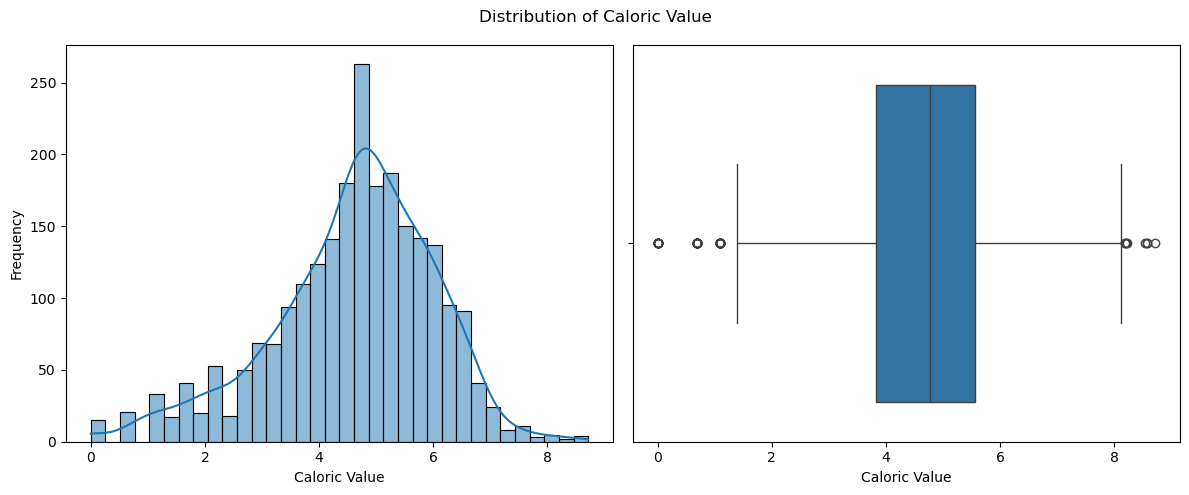

In [38]:
# Check the data distribution of Caloric Value after log transform as a sample
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle(f"Distribution of Caloric Value")

# Histogram
sns.histplot(selected_features["Caloric Value"], kde=True, ax=axes[0])
axes[0].set_ylabel("Frequency")
# Box PLot
sns.boxplot(x=selected_features["Caloric Value"], ax=axes[1])

plt.tight_layout()
plt.show()

* The data distribution changes closer to normal distribution.
* The number of outliers has been reduced 

Check the distribution of Nutrition Density data after transformation

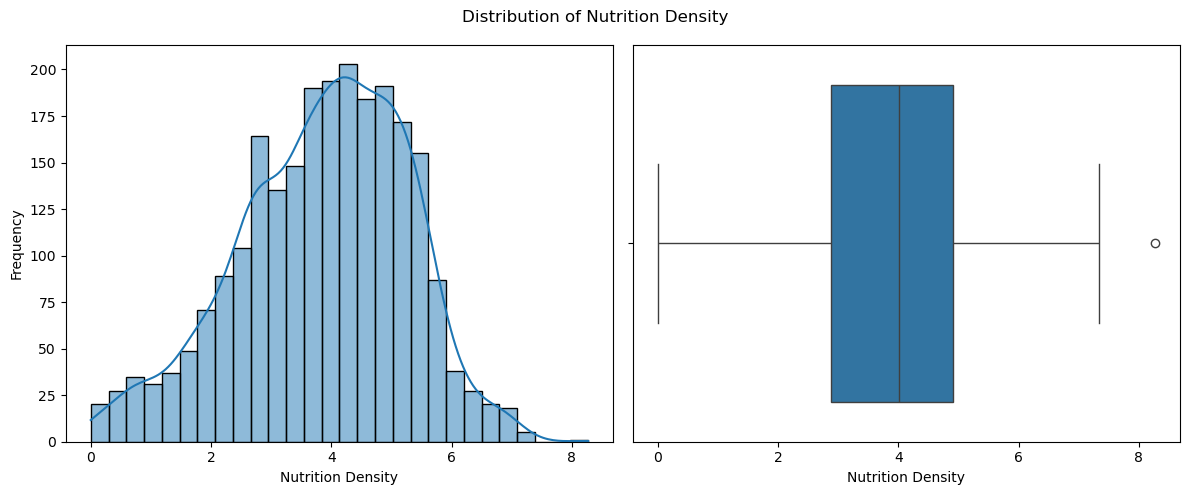

In [39]:
# Check the data distribution of Nutrition Density after log transform as a sample
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle(f"Distribution of Nutrition Density")

# Histogram
sns.histplot(selected_features["Nutrition Density"], kde=True, ax=axes[0])
axes[0].set_ylabel("Frequency")
# Box PLot
sns.boxplot(x=selected_features["Nutrition Density"], ax=axes[1])

plt.tight_layout()
plt.show()

* The data distribution changes closer to normal distribution.
* The number of outliers has been reduced 

#### Normalization

Normalize data using `RobustScaler()` to rescale the data, so that the data will have the same range of values

In [40]:
normalizer = RobustScaler()

data_normalized = normalizer.fit_transform(selected_features)

data_normalized = pd.DataFrame(data_normalized)

data_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.471166,0.251993,0.471213,0.235376,-0.218403,-0.546761,0.216906,-0.483070,-0.689039,0.829402,...,0.015640,-0.061729,-0.01901,-0.785956,-0.418697,-0.884923,-0.806944,-0.778547,-0.304940,-0.944105
1,0.347632,0.645921,0.826405,0.562513,0.218796,-0.200750,0.425644,0.285153,-0.689039,1.255096,...,-0.055195,-0.065907,0.98099,0.557004,-0.401038,-0.067031,0.220327,0.056181,0.365026,0.429390
2,-0.493717,0.156561,0.409041,0.144760,-1.895440,-0.516689,0.454196,-0.524941,-0.089413,0.000000,...,-0.376474,-0.065907,-0.01901,-0.788281,-0.503049,-0.894718,-0.826037,-1.911350,-0.356999,-1.058336
3,-0.768581,-0.014170,0.256046,0.000000,-1.548032,-0.386226,0.006923,-0.301423,-0.689039,0.718386,...,-0.346635,-0.059646,-0.01520,-0.761266,-0.403961,-0.861017,-0.820838,-0.513423,-0.310189,-1.074296
4,-0.768581,0.026422,0.275916,0.044888,-0.706055,-0.443223,0.289621,-0.380781,-0.689039,0.666679,...,-0.363660,-0.065907,0.01514,0.129210,-0.494521,-0.604842,-0.131193,-0.440385,-0.286728,-0.331064


Check the statistical descriptive of normalized data

In [41]:
data_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2395.0,-0.099669,0.820475,-2.743072,-0.547979,0.0,0.452021,2.266445
1,2395.0,-0.136268,0.770926,-2.222942,-0.564603,0.0,0.435397,1.618144
2,2395.0,-0.131465,0.754901,-1.667996,-0.547954,0.0,0.452046,1.932232
3,2395.0,-0.103079,0.729072,-1.533341,-0.527607,0.0,0.472393,1.569898
4,2395.0,-0.145842,0.839304,-1.895440,-0.543052,0.0,0.456948,1.944860
5,2395.0,-0.381262,0.989104,-2.255799,-0.666712,0.0,0.333288,1.035156
6,2395.0,-0.041966,0.505203,-0.553313,-0.553313,0.0,0.446687,1.005659
7,2395.0,-0.203875,1.000953,-2.904476,-0.524941,0.0,0.475059,1.806373
8,2395.0,-0.145637,0.494120,-0.689039,-0.689039,0.0,0.310961,0.771991
9,2395.0,0.468594,0.632919,0.000000,0.000000,0.0,1.000000,2.795622


Check the distribution of Caloric Value data after normalization

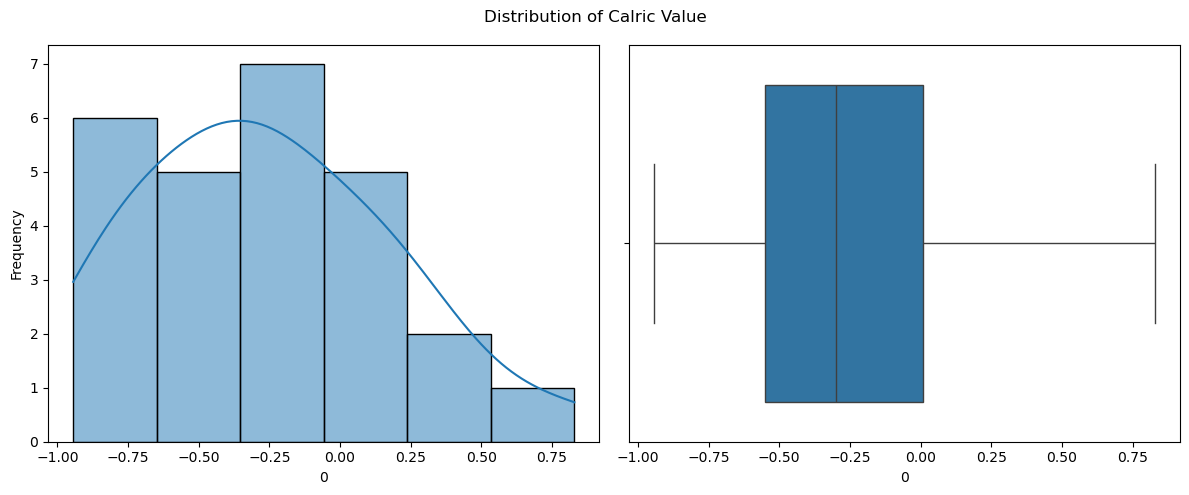

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle(f"Distribution of Calric Value")

# Histogram
sns.histplot(data_normalized.iloc[0], kde=True, ax=axes[0])
axes[0].set_ylabel("Frequency")
# Box PLot
sns.boxplot(x=data_normalized.iloc[0], ax=axes[1])

plt.tight_layout()
plt.show()

Check the distribution of Nutrition Density data after normalization

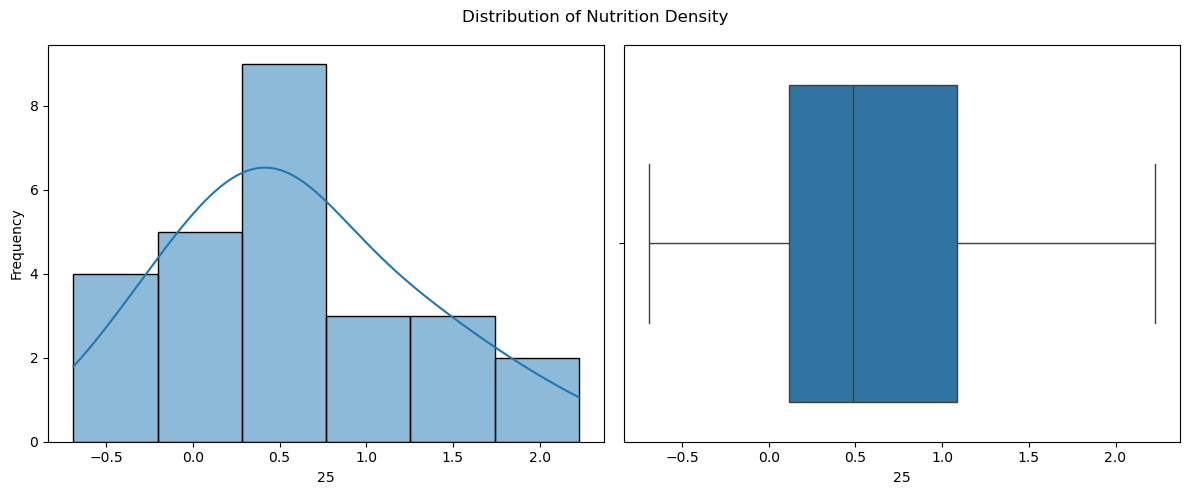

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle(f"Distribution of Nutrition Density")

# Histogram
sns.histplot(data_normalized.iloc[25], kde=True, ax=axes[0])
axes[0].set_ylabel("Frequency")
# Box PLot
sns.boxplot(x=data_normalized.iloc[25], ax=axes[1])

plt.tight_layout()
plt.show()

## Modeling

Determine the number of features as an input

In [48]:
num_of_features = 25

### Scheme 1

#### Model Design

Set the Model 1 configuration

In [113]:
# Model Parameter Config 1
OPTIMIZER_1 = RMSprop()
LOSS_1 = "mse"
METRIC_1 = ["mse", "mae"]
OUTPUT_ACTIVATION_1 = "linear"
DROPOUT_1 = 0.3

Design the layers of the neural network Model 1

In [114]:
input_shape = num_of_features

model_1 = tf.keras.models.Sequential([
    Input(shape=(input_shape,)),
    Dense(units= 64, activation="relu"),
    BatchNormalization(),
    Dropout(DROPOUT_1),
    Dense(units= 32, activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=1, activation=OUTPUT_ACTIVATION_1)
])

model_1.compile(
    optimizer=OPTIMIZER_1,
    loss=LOSS_1,
    metrics=[METRIC_1]
)

model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                1664      
                                                                 
 batch_normalization_9 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                      

#### Training

Set the training configuration for Model 1

In [115]:
# Training Parameters Config 1
EPOCHS = 150
BATCH = 128

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_mae',
    patience=20,
    restore_best_weights=True
)

Train the Model 1

In [116]:
# Train Model
history_1 = model_1.fit(
    X_train_1,
    y_train_1,
    validation_data=(X_val_1, y_val_1),
    epochs=EPOCHS,
    batch_size=BATCH,
    callbacks=[early_stopping]
)

Epoch 1/150
17/17 [==============================] - 1s 23ms/step - loss: 0.5635 - mse: 0.5635 - mae: 0.5720 - val_loss: 0.3228 - val_mse: 0.3228 - val_mae: 0.4546
Epoch 2/150
17/17 [==============================] - 0s 4ms/step - loss: 0.2723 - mse: 0.2723 - mae: 0.4066 - val_loss: 0.2871 - val_mse: 0.2871 - val_mae: 0.4245
Epoch 3/150
17/17 [==============================] - 0s 3ms/step - loss: 0.2051 - mse: 0.2051 - mae: 0.3483 - val_loss: 0.2582 - val_mse: 0.2582 - val_mae: 0.3960
Epoch 4/150
17/17 [==============================] - 0s 3ms/step - loss: 0.1637 - mse: 0.1637 - mae: 0.3059 - val_loss: 0.2501 - val_mse: 0.2501 - val_mae: 0.3885
Epoch 5/150
17/17 [==============================] - 0s 4ms/step - loss: 0.1394 - mse: 0.1394 - mae: 0.2916 - val_loss: 0.2223 - val_mse: 0.2223 - val_mae: 0.3693
Epoch 6/150
17/17 [==============================] - 0s 4ms/step - loss: 0.1198 - mse: 0.1198 - mae: 0.2648 - val_loss: 0.1953 - val_mse: 0.1953 - val_mae: 0.3421
Epoch 7/150
17/17 [==

### Scheme 2

#### Model Design

Set the Model 2 configuration

In [117]:
# Model Parameter Config 2
OPTIMIZER_2 = Adam()
LOSS_2 = "huber"
METRIC_2 = ["mae", "mse"]
OUTPUT_ACTIVATION_2 = "linear"
DROPOUT_2 = 0.3

Design the layers of the neural network Model 2

In [118]:
input_shape = num_of_features

model_2 = tf.keras.models.Sequential([
    Input(shape=(input_shape,)),
    Dense(units= 64, activation="relu"),
    BatchNormalization(),
    Dropout(DROPOUT_2),
    Dense(units= 32, activation="relu"),
    Dense(units=1, activation=OUTPUT_ACTIVATION_2)
])

model_2.compile(
    optimizer=OPTIMIZER_2,
    loss=LOSS_2,
    metrics=[METRIC_2]
)

model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                1664      
                                                                 
 batch_normalization_10 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,033
Trainable params: 3,905
Non-trainable params: 128
__________________________________________________

#### Training

Set the training configuration for Model 2

In [119]:
# Training Parameters Config 2
EPOCHS_2 = 300
BATCH_2 = 128

# Callbacks
early_stopping_2 = EarlyStopping(
    monitor='val_mae',
    patience=20,
    restore_best_weights=True
)

Train the Model 2

In [120]:
# Train Model
history_2 = model_2.fit(
    X_train_2,
    y_train_2,
    validation_data=(X_val_2, y_val_2),
    epochs=EPOCHS_2,
    batch_size=BATCH_2,
    callbacks=[early_stopping_2]
)

Epoch 1/300
15/15 [==============================] - 1s 30ms/step - loss: 0.3286 - mae: 0.6646 - mse: 0.8580 - val_loss: 0.1409 - val_mae: 0.4181 - val_mse: 0.2902
Epoch 2/300
15/15 [==============================] - 0s 4ms/step - loss: 0.2104 - mae: 0.5102 - mse: 0.4925 - val_loss: 0.1376 - val_mae: 0.4062 - val_mse: 0.2804
Epoch 3/300
15/15 [==============================] - 0s 4ms/step - loss: 0.1530 - mae: 0.4294 - mse: 0.3346 - val_loss: 0.1329 - val_mae: 0.4083 - val_mse: 0.2693
Epoch 4/300
15/15 [==============================] - 0s 4ms/step - loss: 0.1311 - mae: 0.3942 - mse: 0.2838 - val_loss: 0.1097 - val_mae: 0.3631 - val_mse: 0.2219
Epoch 5/300
15/15 [==============================] - 0s 4ms/step - loss: 0.1167 - mae: 0.3681 - mse: 0.2491 - val_loss: 0.1118 - val_mae: 0.3671 - val_mse: 0.2261
Epoch 6/300
15/15 [==============================] - 0s 4ms/step - loss: 0.0994 - mae: 0.3408 - mse: 0.2068 - val_loss: 0.0999 - val_mae: 0.3458 - val_mse: 0.2021
Epoch 7/300
15/15 [==

## Evaluation

### Scheme 1

Visualize the result of training Model 1

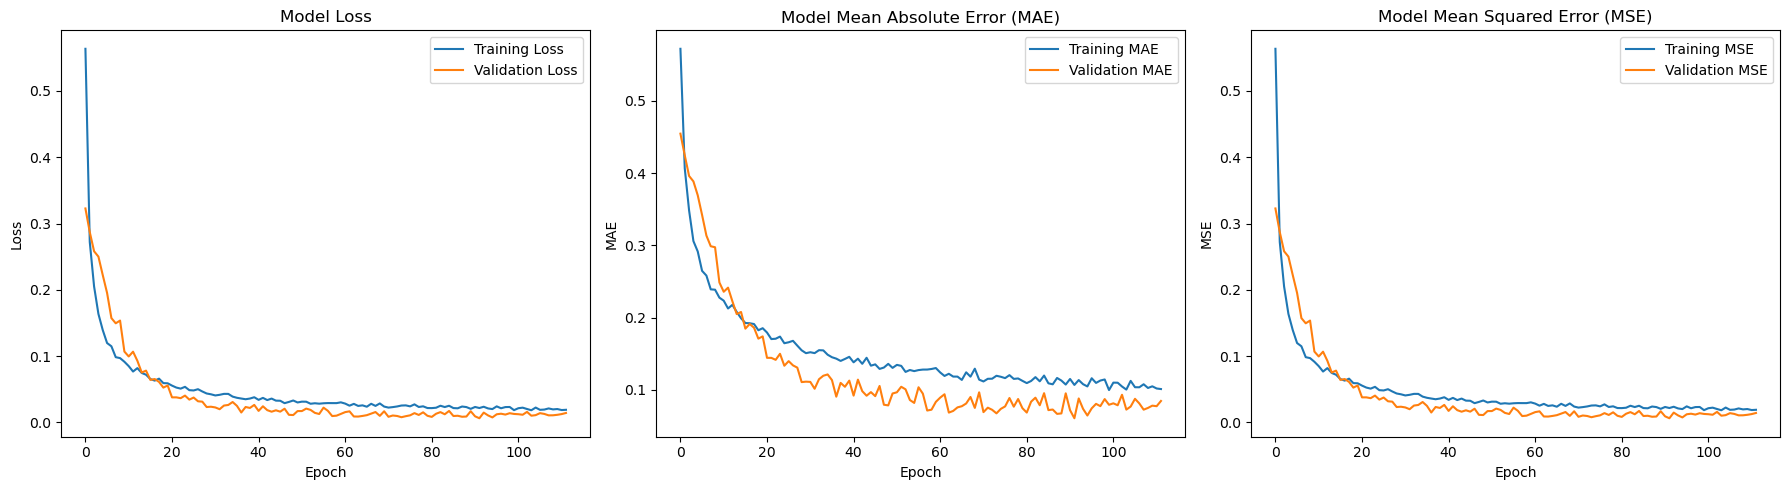

In [121]:
plt.figure(figsize=(18, 5))

# Loss
plt.subplot(1, 3, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 3, 2)
plt.plot(history_1.history['mae'], label='Training MAE')
plt.plot(history_1.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# MSE
plt.subplot(1, 3, 3)
plt.plot(history_1.history['mse'], label='Training MSE')
plt.plot(history_1.history['val_mse'], label='Validation MSE')
plt.title('Model Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

Check the loss, mse, and mae value from model validation

In [122]:
loss, mae, mse = model_1.evaluate(X_val_1, y_val_1)

print(f"Loss Model 2: {loss:.4f} \nMAE Model 2: {mae:4f} \nMSE Model 2: {mse:4f}")

4/4 [==============================] - 0s 0s/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0609
Loss Model 2: 0.0063 
MAE Model 2: 0.006342 
MSE Model 2: 0.060863


Use the Model 1 to predict data_test and check the error rate from mse, mae,and r-squared metrics

In [123]:
# Predict
y_pred_1 = model_1.predict(X_test_1)

mse_1 = mean_squared_error(y_test_1, y_pred_1)
mae_1 = mean_absolute_error(y_test_1, y_pred_1)
r2_1 = r2_score(y_test_1, y_pred_1)

# Recap
evaluasi_model_1 = pd.DataFrame({
    "Model Name": ["Model 1", "Model 1", "Model 1"],
    "Model Version": ["v1.0", "v1.0", "v1.0"],
    "Metrics": ["MSE", "MAE", "R-squared"],
    "Values": [mse_1, mae_1, r2_1]
})

model_1_evaluation = evaluasi_model_1.round(4)
model_1_evaluation

4/4 [==============================] - 0s 2ms/step


,Model Name,Model Version,Metrics,Values
0,Model 1,v1.0,MSE,0.0071
1,Model 1,v1.0,MAE,0.0641
2,Model 1,v1.0,R-squared,0.9859


### Scheme 2

Visualize the result of training Model 2

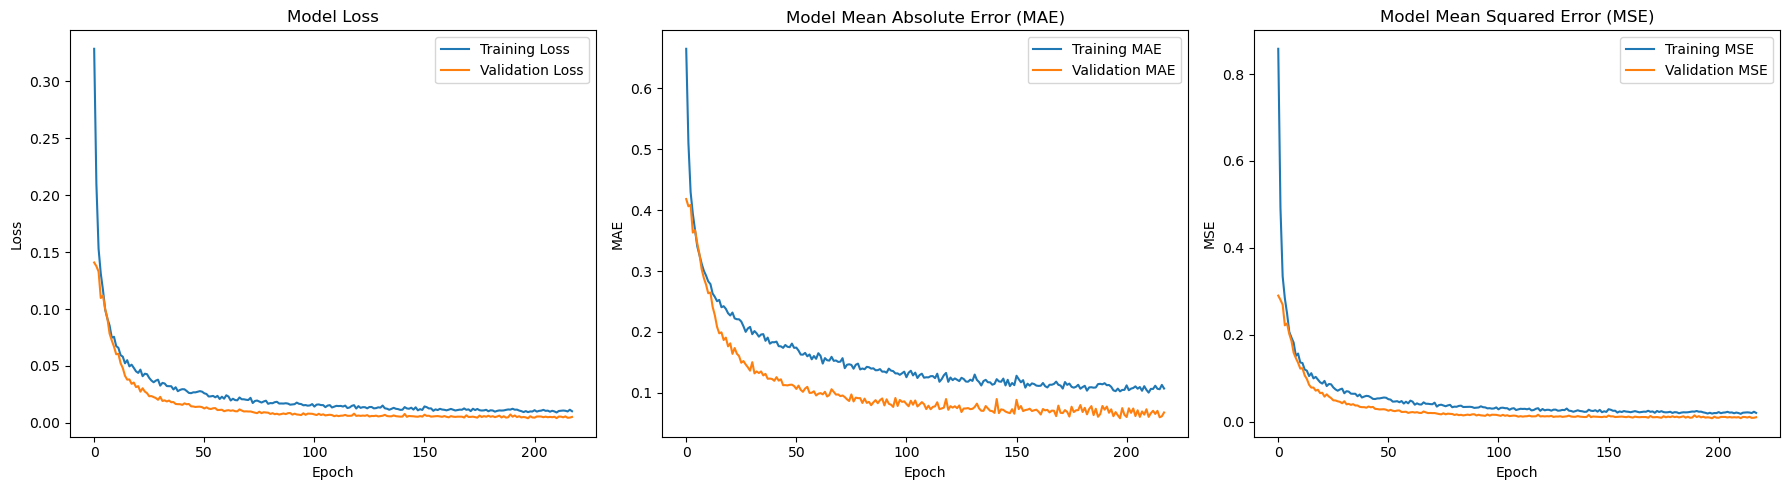

In [124]:
plt.figure(figsize=(18, 5))

# Loss

plt.subplot(1, 3, 1)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 3, 2)
plt.plot(history_2.history['mae'], label='Training MAE')
plt.plot(history_2.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# MSE
plt.subplot(1, 3, 3)
plt.plot(history_2.history['mse'], label='Training MSE')
plt.plot(history_2.history['val_mse'], label='Validation MSE')
plt.title('Model Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

Check the loss, mse, and mae value from model validation

In [125]:
loss_2, mae_2, mse_2 = model_2.evaluate(X_val_2, y_val_2)

print(f"Loss Model 2: {loss_2:.4f} \nMAE Model 2: {mae_2:4f} \nMSE Model 2: {mse_2:4f}")

8/8 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0585 - mse: 0.0081
Loss Model 2: 0.0040 
MAE Model 2: 0.058471 
MSE Model 2: 0.008087


Use the Model 2 to predict data_test and check the error rate from mse, mae,and r-squared metrics

In [126]:
# Predict
y_pred_2 = model_2.predict(X_test_2)

mse_2 = mean_squared_error(y_test_2, y_pred_2)
mae_2 = mean_absolute_error(y_test_2, y_pred_2)
r2_2 = r2_score(y_test_2, y_pred_2)

# Recap
evaluasi_model_2 = pd.DataFrame({
    "Model Name": ["Model 2", "Model 2", "Model 2"],
    "Model Version": ["v1.0", "v1.0", "v1.0"],
    "Metrics": ["MSE", "MAE", "R-squared"],
    "Values": [mse_2, mae_2, r2_2]
})

model_2_evaluation = evaluasi_model_2.round(4)
model_2_evaluation

8/8 [==============================] - 0s 971us/step


,Model Name,Model Version,Metrics,Values
0,Model 2,v1.0,MSE,0.0087
1,Model 2,v1.0,MAE,0.0685
2,Model 2,v1.0,R-squared,0.9823


### Model Comparison

Compare the result of models evaluation 

In [129]:
model_comparison = pd.concat([model_1_evaluation, model_2_evaluation], ignore_index=True)

model_comparison = model_comparison.pivot_table(index='Metrics', columns='Model Name', values='Values')

model_comparison.round(2)

Model Name,Model 1,Model 2
Metrics,,
MAE,0.06,0.07
MSE,0.01,0.01
R-squared,0.99,0.98


Visualize the prediction result of the models

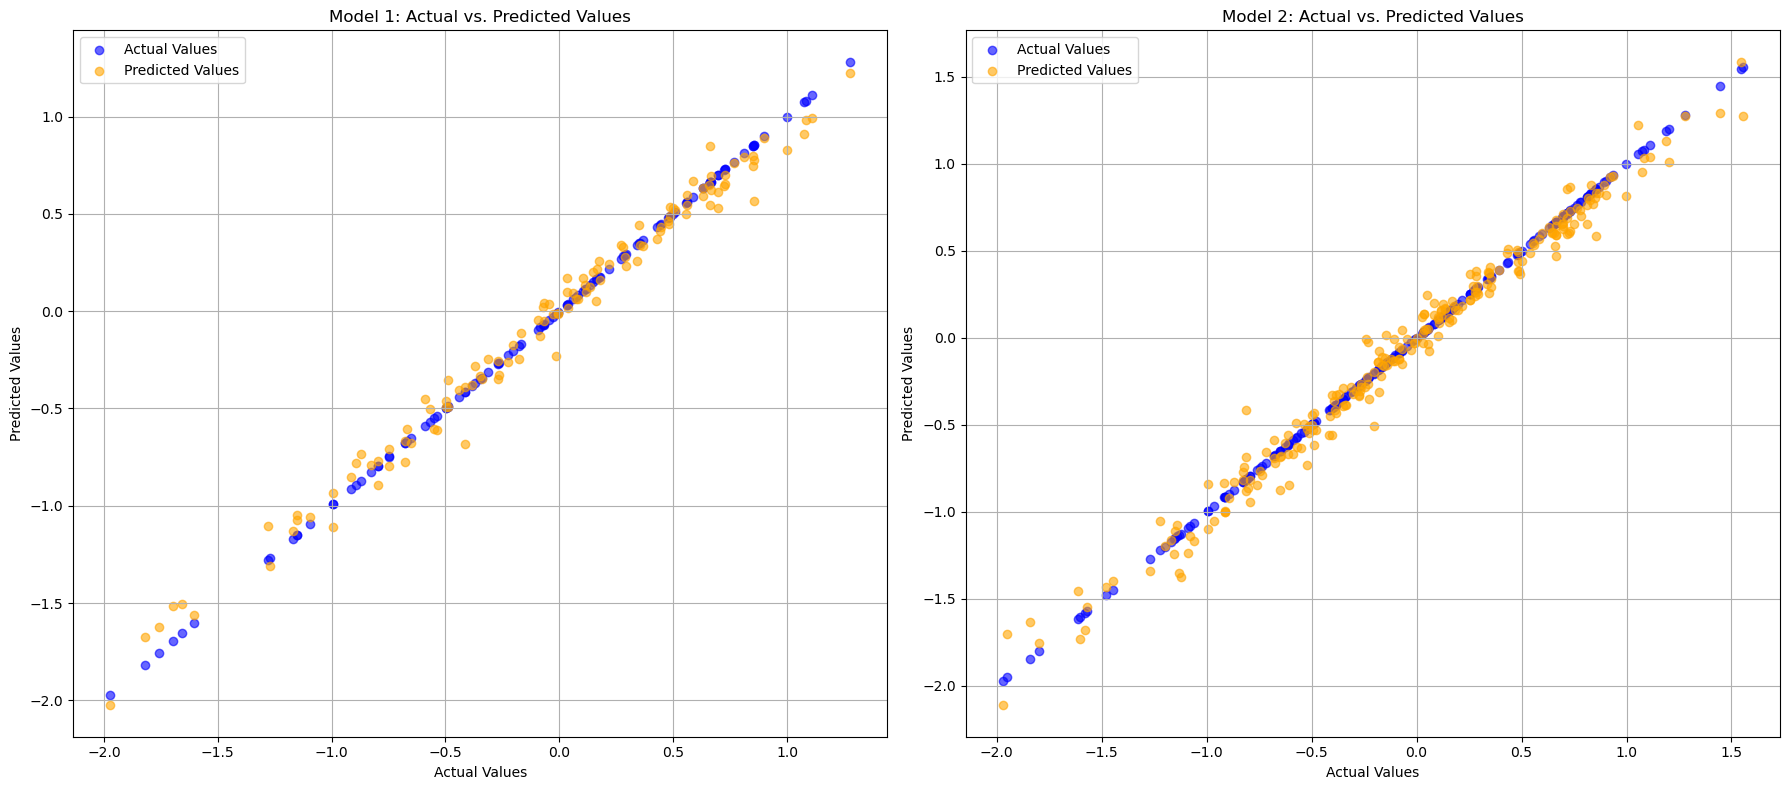

In [131]:
plt.figure(figsize=(18, 8))

# Model 1
plt.subplot(1, 2, 1)

# Actual Value
plt.scatter(y_test_1, y_test_1, color='blue', alpha=0.6, label='Actual Values')

# Predicted Value
plt.scatter(y_test_1, y_pred_1, color='orange', alpha=0.6, label='Predicted Values')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model 1: Actual vs. Predicted Values')
plt.legend()  
plt.grid()

# Model 1
plt.subplot(1, 2, 2)

# Actual Value
plt.scatter(y_test_2, y_test_2, color='blue', alpha=0.6, label='Actual Values')

# Predicted Value
plt.scatter(y_test_2, y_pred_2, color='orange', alpha=0.6, label='Predicted Values')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model 2: Actual vs. Predicted Values')
plt.legend()  
plt.grid()

plt.tight_layout()
plt.show()

## Inference

### Create Dummy Data

Create dummy data to be used in Model Testing

In [132]:
# Create Dummy Data
random_st = 123
np.random.seed(random_st)

dummy_data = pd.DataFrame({
    col: np.random.uniform(merged_data[col].min(), merged_data[col].median(), size=100)
    for col in merged_data.select_dtypes("number").columns[:-1]
})

dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Caloric Value         100 non-null    float64
 1   Fat                   100 non-null    float64
 2   Saturated Fats        100 non-null    float64
 3   Monounsaturated Fats  100 non-null    float64
 4   Polyunsaturated Fats  100 non-null    float64
 5   Carbohydrates         100 non-null    float64
 6   Sugars                100 non-null    float64
 7   Protein               100 non-null    float64
 8   Dietary Fiber         100 non-null    float64
 9   Cholesterol           100 non-null    float64
 10  Sodium                100 non-null    float64
 11  Water                 100 non-null    float64
 12  Vitamin A             100 non-null    float64
 13  Vitamin B1            100 non-null    float64
 14  Vitamin B11           100 non-null    float64
 15  Vitamin B12           10

Round the value to 2 decimals

In [133]:
dummy_data.round(2).head()

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Vitamin K,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc
0,81.49,1077.57,271.32,8.20,182.51,1447.25,60.32,3308.33,77.44,0.0,...,0.00,9.08,0.01,0.24,0.98,0.10,20.68,108.87,0.04,0.09
1,33.48,1399.91,33.39,360.59,111.92,2667.67,60.85,1015.30,111.17,0.0,...,0.01,13.60,0.08,0.10,8.01,0.17,18.70,81.06,0.01,0.23
2,26.54,222.41,326.68,3.87,373.16,5790.53,82.55,2544.65,2.83,0.0,...,0.01,4.50,0.01,0.30,2.31,0.10,1.12,20.43,0.02,0.09
3,64.50,274.88,498.04,42.41,125.74,867.76,75.40,52.56,169.53,0.0,...,0.00,1.83,0.08,0.14,2.53,0.15,14.21,99.05,0.04,0.15
4,84.18,676.16,384.70,112.75,363.89,6078.28,40.25,3077.00,184.38,0.0,...,0.01,2.40,0.08,0.25,1.36,0.03,40.92,53.57,0.02,0.15


### Preprocessing Dummy Data

#### Features Selection

In [134]:
columns_to_eliminate[1:]

['Vitamin A',
 'Vitamin B11',
 'Vitamin B12',
 'Vitamin D',
 'Vitamin K',
 'Copper',
 'Manganese',
 'Selenium']

Remove the columns have little influence to the nutrition density

In [135]:
dummy_data = dummy_data.drop(columns=columns_to_eliminate[1:], axis=1)

Ensure the number of columns after features selection

In [136]:
print(f"Number of columns: {dummy_data.shape[1]}")

Number of columns: 25


### Predict Nutrition Density

Model testing to predict nutrient density on dummy data

In [137]:
# Use Model 1 as the best trained model
nutrition_density_pred = model_1.predict(dummy_data)
dummy_data["Nutrition Density"] = nutrition_density_pred

4/4 [==============================] - 0s 1ms/step


Show the top 5 of dummy data including prediction data

In [138]:
dummy_data.head()

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Vitamin B6,Vitamin C,Vitamin E,Calcium,Iron,Magnesium,Phosphorus,Potassium,Zinc,Nutrition Density
0,81.486895,1077.569124,271.317963,8.196240,182.508240,1447.254190,60.316943,3308.328222,77.439041,0.0,...,0.002580,0.027496,0.000859,9.084074,0.235148,0.982091,20.682026,108.866552,0.089924,613.645020
1,33.478302,1399.911555,33.387222,360.592183,111.920807,2667.667683,60.851976,1015.302488,111.171917,0.0,...,0.056717,0.025546,0.004100,13.599733,0.097858,8.006337,18.699349,81.056308,0.225137,1953.719238
2,26.541620,222.407819,326.682436,3.868757,373.156659,5790.526749,82.554766,2544.649604,2.828761,0.0,...,0.042611,0.002386,0.001596,4.501901,0.301323,2.308665,1.119493,20.426434,0.087467,1250.929443
3,64.503828,274.879396,498.043164,42.411139,125.740541,867.763125,75.396603,52.556519,169.529399,0.0,...,0.024188,0.057461,0.000628,1.826054,0.143051,2.526770,14.205642,99.051786,0.154904,1511.014404
4,84.177869,676.159274,384.698669,112.749205,363.885865,6078.284502,40.253131,3076.998534,184.383972,0.0,...,0.071538,0.043971,0.000921,2.398188,0.246623,1.358207,40.923676,53.569516,0.146336,1362.373535


Save dummy data including predictions into a csv file

In [139]:
dummy_data.to_csv('predictions_of_dummy_data.csv', index=False)

Visualize the result of prediction to see the data distribution

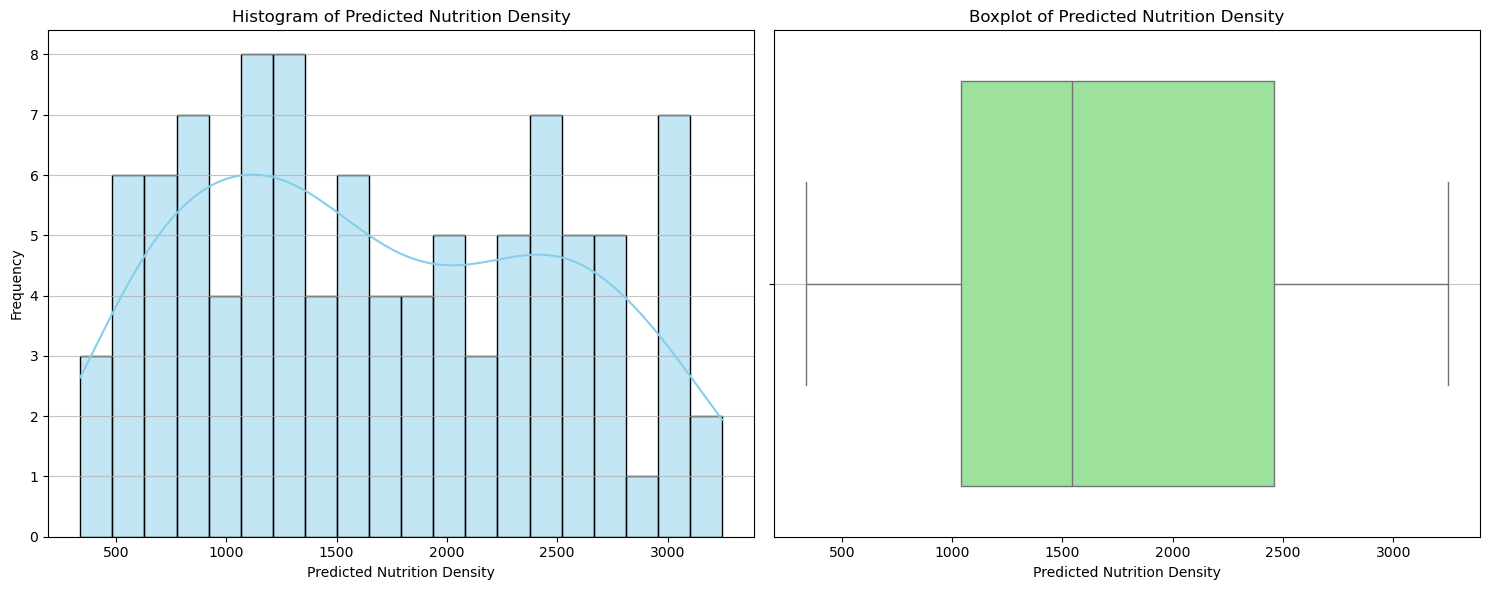

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram 
sns.histplot(dummy_data["Nutrition Density"], bins=20, color='skyblue', edgecolor='black', kde=True, ax=axes[0])
axes[0].set_title('Histogram of Predicted Nutrition Density')
axes[0].set_xlabel('Predicted Nutrition Density')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.75)

# Boxplot
sns.boxplot(x=dummy_data["Nutrition Density"], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of Predicted Nutrition Density')
axes[1].set_xlabel('Predicted Nutrition Density')
axes[1].grid(axis='y', alpha=0.75)


plt.tight_layout()
plt.show()

## Conclusion

1. The model is regression model because it aims to predict a continuous outcome (Nutrition Density Values) based on various input features (nutrient values). The prediction is estimating nutrient density values, which inherently involves predicting numerical quantities.

2. All data have skewed distribution and outliers, whereas the neural network model is more suitable for normally distributed data. Hence, the data needs to be transformed to logarithmic values and then normalized. By pre-processing the data this way, we can enhance the model's ability to learn meaningful patterns, leading to better performance and generalization on unseen data.

3. Based on the model evaluation, the architecture design and training scheme (as splitting data into 90% `data_train`, 5% `data_validation`, and 5% `data_test`) of Model 1 is better than Model 2. This is drawn from comparing metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared values between the two models. The choice of architecture such as the number of layers and nodes, loss functions, and optimization techniques used in Model 1, likely contributed to its performance. In addition, there are recommendations to develop a model with superior performance as follows:

    * Further refinement of feature selection may enhance model performance. Identifying key features that significantly impact nutrition density could lead to improved predictive accuracy.
    * Explore different architectures and hyperparameter settings then identify the optimal configuration for the model.
    * Implementing regularization techniques such as dropout, L1/L2 regularization, or batch normalization can help prevent overfitting in complex models.

## Development Opportunity

__1. Meal Reccomendation System__.
By integrating this dataset with broader dietary data, machine learning models can recommend dietary adjustments to individuals. For instance, a recommendation system could suggest lower-calorie or lower-sugar food alternatives to users looking to reduce their calorie intake but who still want to get high nutrition. Machine learning models can integrate food consumption data into broader dietary tracking tools used in fitness and health apps, providing users with insights for their dietary meal plan.

__2. Predictive Modeling for Health Impacts__.
With sufficient data linking meal consumption to health outcomes, predictive models could forecast health impacts based on meal consumption patterns. This could be particularly useful public health.

## References

1. Alfarisi, B. I., et al. (2023). *Mengungkap Kesehatan Melalui Angka: Prediksi Malnutrisi Melalui Penilaian Status Gizi dan Asupan Makronutrien.* Prosiding SNPPM-5, 299-311.
2. Bouma, S. (2017). *Diagnosing Pediatric Malnutrition: Paradigm Shifts of Etiology-Related Definitions and Appraisal of the Indicators.* Nutrition in Clinical Practice, 32(1), 52–67.
3. Cakrawala. (2024). *Apa itu Neural Network? Ini Pengertian, Konsep, dan Contohnya.* Retrieved October 31, 2024, from [https://www.cakrawala.ac.id/berita/neural-network-adalah](https://www.cakrawala.ac.id/berita/neural-network-adalah).
4. Cederholm, T., et al. (2019). *GLIM criteria for the diagnosis of malnutrition – A consensus report from the global clinical nutrition community.* Journal of Cachexia, Sarcopenia and Muscle, 10(1), 207–217.
5. European Food Information Council (EUFIC). (2021). *What is nutrient density?* Retrieved October 31, 2024, from [https://www.eufic.org/en/understanding-science/article/what-is-nutrient-density](https://www.eufic.org/en/understanding-science/article/what-is-nutrient-density).
6. Khan, D. S. A., et al. (2022). *Nutritional Status and Dietary Intake of School-Age Children and Early Adolescents: Systematic Review in a Developing Country and Lessons for the Global Perspective.* Frontiers in Nutrition, 8(February).
7. Ministry of Health of the Republic of Indonesia. (2018). Situasi Balita Pendek (Stunting) di Indonesia.
8. RevoU. (2024). *Apa itu Neural Network.* Retrieved October 31, 2024, from [https://revou.co/kosakata/neural-network](https://revou.co/kosakata/neural-network).
9. Rinninella, E., et al. (2017). *Clinical tools to assess nutritional risk and malnutrition in hospitalized children and adolescents.* European Review for Medical and Pharmacological Sciences, 21(11), 2690–2701.
10. Simbolon, D. (2013). *Model Prediksi Indeks Massa Tubuh Remaja Berdasarkan Riwayat Lahir dan Status Gizi Anak.* Kesmas, 8(1), 19–27.
11. Yamantri, A. B., & Rifa’i, A. A. (2024). *Penerapan Algoritma C4.5 Untuk Prediksi Faktor Risiko Obesitas Pada Penduduk Dewasa.* Jurnal Komputer Antartika, 2(3), 118–125.
12. Zianka, I. D., et al. (2024). *The Design Android Application Nutrition Calculation to Prevent Stunting with CNN Method in Jakarta.* MALCOM: Indonesian Journal of Machine Learning and Computer Science, 4, 99–107.